In [64]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [65]:
df = pd.read_csv("players_merged.csv")
df.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [66]:
df = df[df.columns.drop(list(df.filter(regex='url')))]

df.shape

(19239, 104)

In [67]:
df.dtypes

sofifa_id            int64
short_name          object
long_name           object
player_positions    object
overall              int64
                     ...  
lcb                 object
cb                  object
rcb                 object
rb                  object
gk                  object
Length: 104, dtype: object

# Will see what columns have more that 50% missing values so we can drop it

In [68]:
cols_to_drop = []
for i in df.columns:
    missing = np.abs((df[i].count() - df[i].shape[0])/df[i].shape[0] * 100)
    if missing > 50:
        print('{} - {}%'.format(i, round(missing)))
        cols_to_drop.append(i)

club_loaned_from - 94%
nation_team_id - 96%
nation_position - 96%
nation_jersey_number - 96%
player_tags - 93%
player_traits - 51%
goalkeeping_speed - 89%


In [69]:
df.drop(columns=cols_to_drop,inplace=True)
print(df.shape)

(19239, 97)


In [70]:
df.rename(columns={'skill_moves':'skills'},inplace=True)

In [71]:
filter = ['sofifa_id','skill_','movement_','defending_','goalkeeping_','attacking_','power_','mentality_']

for i in filter:
    df = df[df.columns.drop(list(df.filter(regex=i)))]

df.shape

(19239, 62)

In [72]:
df.columns

Index(['short_name', 'long_name', 'player_positions', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg',
       'club_team_id', 'club_name', 'league_name', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined',
       'club_contract_valid_until', 'nationality_id', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skills', 'international_reputation',
       'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk'],
      dtype='object')

In [73]:
df1 = df[['short_name','age','height_cm','weight_kg','nationality_name','club_name','overall','potential','league_name','league_level',
          'value_eur','wage_eur','player_positions','preferred_foot','international_reputation',
          'skills', 'work_rate', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   short_name                19239 non-null  object 
 1   age                       19239 non-null  int64  
 2   height_cm                 19239 non-null  int64  
 3   weight_kg                 19239 non-null  int64  
 4   nationality_name          19239 non-null  object 
 5   club_name                 19178 non-null  object 
 6   overall                   19239 non-null  int64  
 7   potential                 19239 non-null  int64  
 8   league_name               19178 non-null  object 
 9   league_level              19178 non-null  float64
 10  value_eur                 19165 non-null  float64
 11  wage_eur                  19178 non-null  float64
 12  player_positions          19239 non-null  object 
 13  preferred_foot            19239 non-null  object 
 14  intern

In [75]:
df1.isnull().sum()

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
nationality_name               0
club_name                     61
overall                        0
potential                      0
league_name                   61
league_level                  61
value_eur                     74
wage_eur                      61
player_positions               0
preferred_foot                 0
international_reputation       0
skills                         0
work_rate                      0
pace                        2132
shooting                    2132
passing                     2132
dribbling                   2132
defending                   2132
physic                      2132
dtype: int64

# Exploratory data analysis

In [76]:
player_positions = df1['player_positions'].value_counts().head(20)
player_positions

CB         2423
GK         2132
ST         1770
CDM, CM     953
CM          726
CM, CDM     687
LB          616
RB          576
CB, RB      295
CDM         294
CAM, CM     249
CB, LB      232
CAM         219
LB, LM      206
LM          206
CM, CAM     203
CB, CDM     202
RM, LM      196
RM          196
LM, RM      168
Name: player_positions, dtype: int64

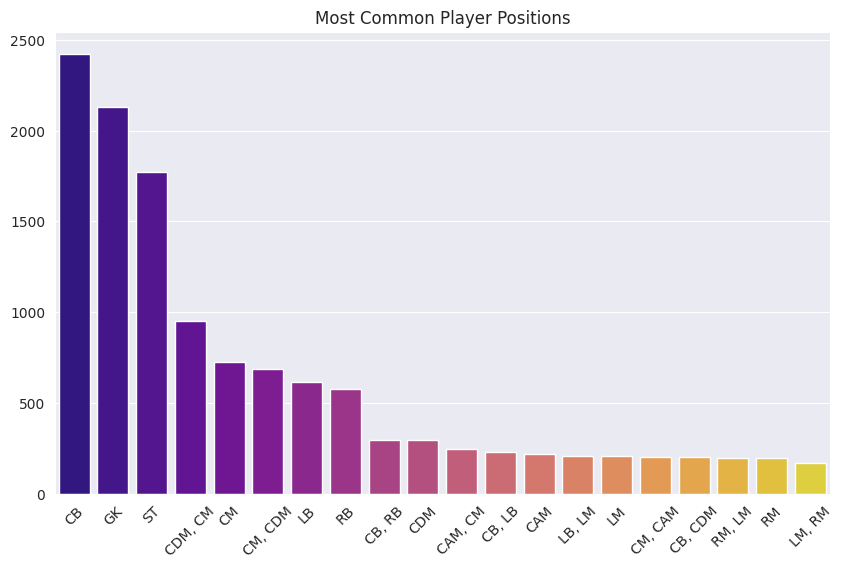

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x=player_positions.index, y=player_positions.values,palette="plasma",capsize=.2)

plt.title('Most Common Player Positions')
plt.xticks(rotation=45)
plt.show()

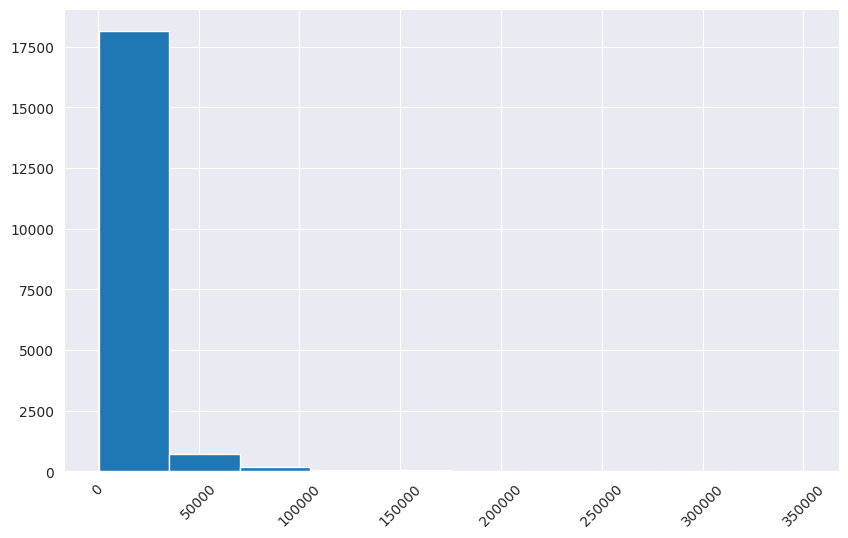

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(x=df1.wage_eur,bins=10)


plt.xticks(rotation=45)
plt.show()

In [79]:
country_players = df1['nationality_name'].value_counts().head(10)
country_players

England          1719
Germany          1214
Spain            1086
France            980
Argentina         960
Brazil            897
Japan             546
Netherlands       439
United States     413
Poland            403
Name: nationality_name, dtype: int64

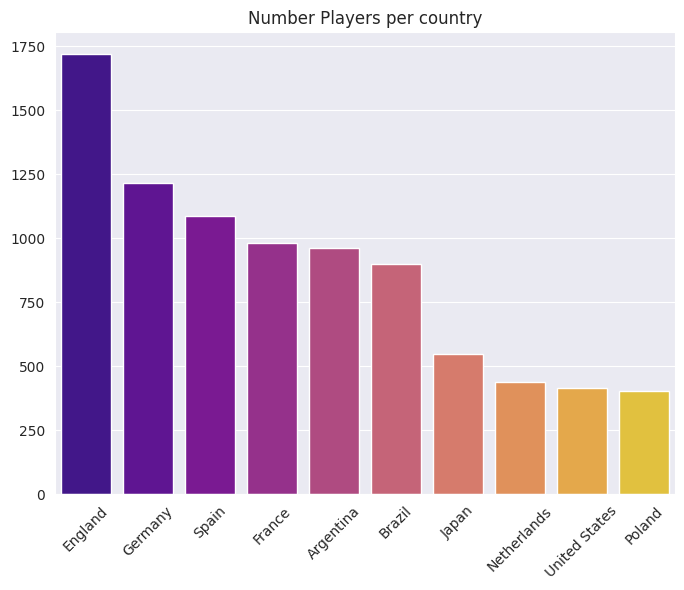

In [80]:
plt.figure(figsize=(8, 6))
sns.barplot(x=country_players.index, y=country_players.values,palette="plasma",capsize=.2)

plt.title('Number Players per country')
plt.xticks(rotation=45)
plt.show()

In [81]:
hg_skills = df1[df1.skills == 5]
hg_skills['nationality_name'].value_counts()

Brazil                 12
Portugal                6
France                  6
Argentina               6
England                 2
Morocco                 2
Colombia                2
Congo DR                2
Ukraine                 1
Republic of Ireland     1
Thailand                1
Gambia                  1
Romania                 1
Germany                 1
Switzerland             1
Mexico                  1
Norway                  1
Côte d'Ivoire           1
Slovenia                1
Sweden                  1
Netherlands             1
Algeria                 1
Spain                   1
Scotland                1
Name: nationality_name, dtype: int64

# Relationship between skills and Wages

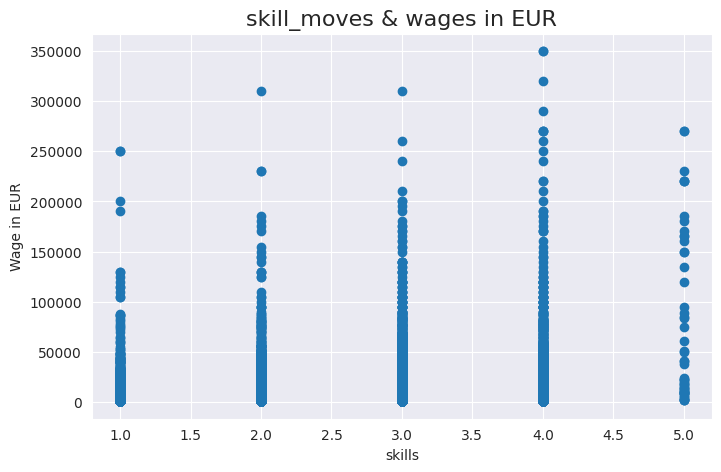

In [82]:
#Relationship between skills  and Wages

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = df1, x= 'skills', y='wage_eur')
plt.xlabel("skills")
plt.ylabel("Wage in EUR")
plt.title("skill_moves & wages in EUR", fontsize = 16)
plt.show()

# Relationship between international_reputation and wages

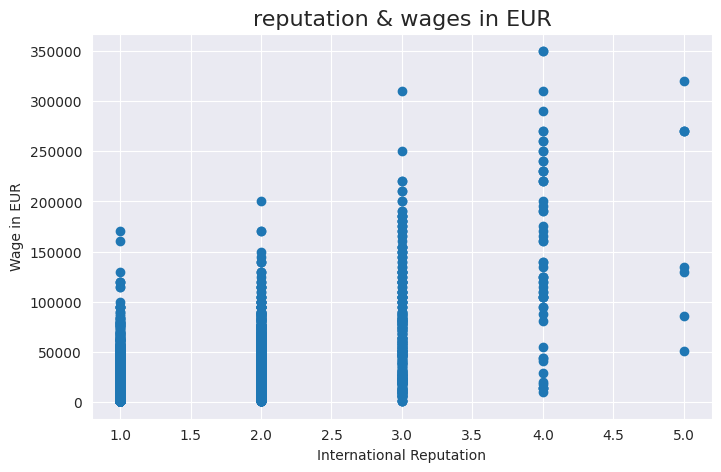

In [83]:
#Relationship between international_reputation  and wages

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = df1, x= 'international_reputation', y='wage_eur')
plt.xlabel("International Reputation")
plt.ylabel("Wage in EUR")
plt.title("reputation & wages in EUR", fontsize = 16)
plt.show()

# Relationship between potential and wages

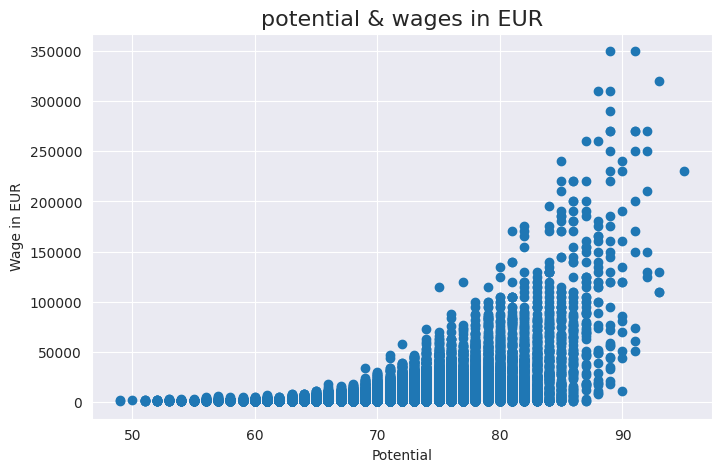

In [84]:
#Relationship between potential  and wages

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = df1, x= 'potential', y='wage_eur')
plt.xlabel("Potential")
plt.ylabel("Wage in EUR")
plt.title("potential & wages in EUR", fontsize = 16)
plt.show()

# Relationship between overall and wages

In [ ]:
#Relationship between overall  and wages

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = df, x= 'overall', y='wage_eur')
plt.xlabel("Overall")
plt.ylabel("Wage in EUR")
plt.title("overall & wages in EUR", fontsize = 16)
plt.show()

# Relationship between age and wages

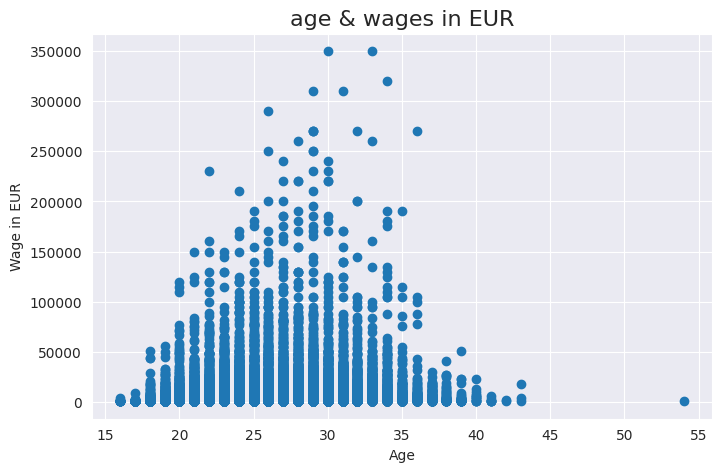

In [85]:
#Relationship between age  and wages

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = df, x= 'age', y='wage_eur')
plt.xlabel("Age")
plt.ylabel("Wage in EUR")
plt.title("age & wages in EUR", fontsize = 16)
plt.show()

In [86]:
df1.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality_name',
       'club_name', 'overall', 'potential', 'league_name', 'league_level',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'skills', 'work_rate', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic'],
      dtype='object')

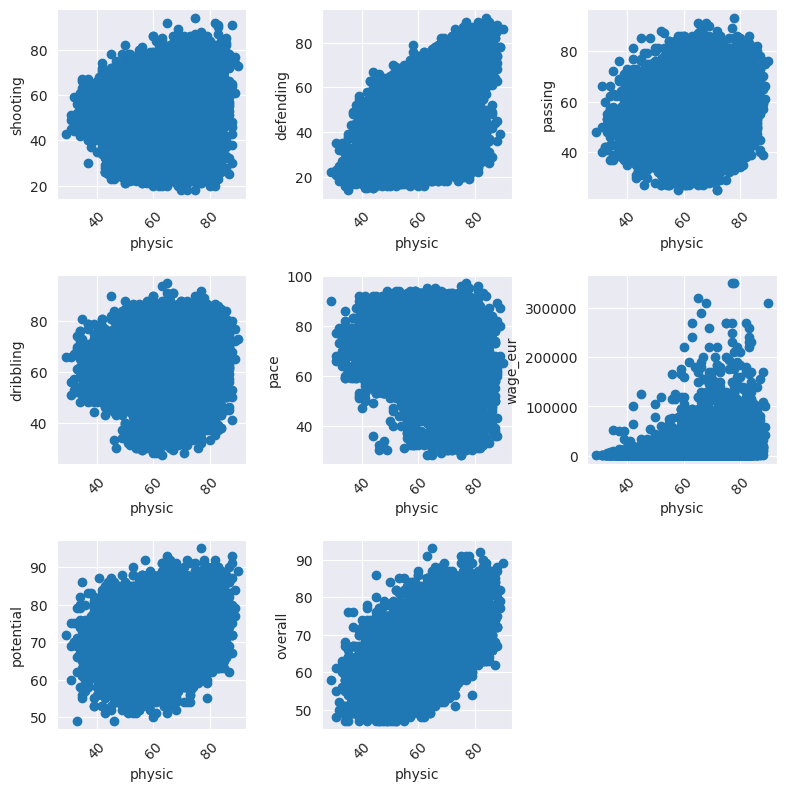

In [87]:
df_x = df[['shooting','defending','passing','dribbling','pace','wage_eur','potential','overall']]

plt.figure(figsize=(9, 9))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

width = 3
height = 3
index = 1
for i in df_x.columns:
    plt.subplot(height, width, index)
    plt.scatter(x=df['physic'],y=df_x[i])
    plt.xlabel('physic')
    plt.ylabel(i)
    plt.xticks(rotation=45)
    index = index + 1

# Age distribution

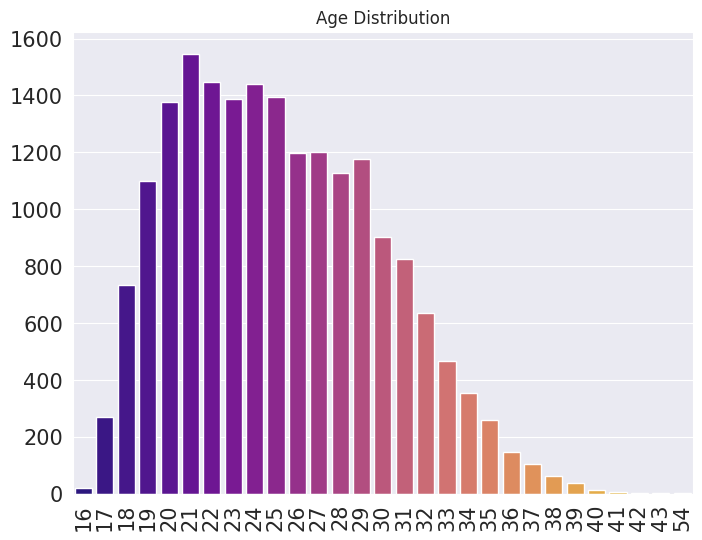

In [88]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df1.age.value_counts().index, y=df1.age.value_counts().values,palette="plasma",capsize=.2)

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.title('Age Distribution')
plt.show()

# Overall score of the players

In [89]:
df1.sort_values(by='overall',ascending=False)[["short_name","overall","age"]].head(20)

,short_name,overall,age
0,L. Messi,93,34
1,R. Lewandowski,92,32
2,Cristiano Ronaldo,91,36
3,Neymar Jr,91,29
4,K. De Bruyne,91,30
5,J. Oblak,91,28
6,K. Mbappé,91,22
7,M. Neuer,90,35
8,M. ter Stegen,90,29
9,H. Kane,90,27


# L. Messi, R. Lewandowski, Cristiano Ronaldo, Neymar Jr, K. De Bruyne,J. Oblak and K. Mbappé has highest overall score than the rest of the players.

# Overall score of the players

In [90]:
# Overall score of the players

#We filter players under or 25
young_players = df1[df1['age'] <= 25]

sorted_players = young_players.sort_values(by='potential', ascending=False)

potential = sorted_players[['short_name', 'potential', 'age']].head(20)

potential

,short_name,potential,age
6,K. Mbappé,95,22
29,E. Haaland,93,20
21,G. Donnarumma,93,22
43,F. de Jong,92,24
44,T. Alexander-Arnold,92,22
138,K. Havertz,92,22
139,P. Foden,92,21
198,João Félix,91,21
195,F. Chiesa,91,23
387,Pedri,91,18


# K.Mbappé, E.Haaland, G. Donnarumma, G. Donnarumma and T. Alexander-Arnold are the players unders or 25 with the highest potential

In [91]:
top_players = df1.sort_values(by='overall',ascending=False).head(30)
top_players

,short_name,age,height_cm,weight_kg,nationality_name,club_name,overall,potential,league_name,league_level,...,preferred_foot,international_reputation,skills,work_rate,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,34,170,72,Argentina,Paris Saint-Germain,93,93,French Ligue 1,1.0,...,Left,5,4,Medium/Low,85.0,92.0,91.0,95.0,34.0,65.0
1,R. Lewandowski,32,185,81,Poland,FC Bayern München,92,92,German 1. Bundesliga,1.0,...,Right,5,4,High/Medium,78.0,92.0,79.0,86.0,44.0,82.0
2,Cristiano Ronaldo,36,187,83,Portugal,Manchester United,91,91,English Premier League,1.0,...,Right,5,5,High/Low,87.0,94.0,80.0,88.0,34.0,75.0
3,Neymar Jr,29,175,68,Brazil,Paris Saint-Germain,91,91,French Ligue 1,1.0,...,Right,5,5,High/Medium,91.0,83.0,86.0,94.0,37.0,63.0
4,K. De Bruyne,30,181,70,Belgium,Manchester City,91,91,English Premier League,1.0,...,Right,4,4,High/High,76.0,86.0,93.0,88.0,64.0,78.0
5,J. Oblak,28,188,87,Slovenia,Atlético de Madrid,91,93,Spain Primera Division,1.0,...,Right,5,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN
6,K. Mbappé,22,182,73,France,Paris Saint-Germain,91,95,French Ligue 1,1.0,...,Right,4,5,High/Low,97.0,88.0,80.0,92.0,36.0,77.0
7,M. Neuer,35,193,93,Germany,FC Bayern München,90,90,German 1. Bundesliga,1.0,...,Right,5,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN
8,M. ter Stegen,29,187,85,Germany,FC Barcelona,90,92,Spain Primera Division,1.0,...,Right,4,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN
9,H. Kane,27,188,89,England,Tottenham Hotspur,90,90,English Premier League,1.0,...,Right,4,3,High/High,70.0,91.0,83.0,83.0,47.0,83.0


# Age distribution of top players

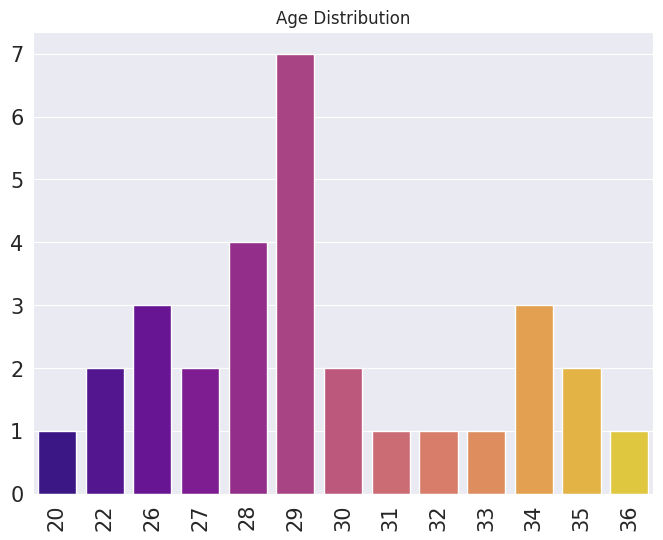

In [92]:
plt.figure(figsize=(8, 6))
sns.barplot(x=top_players.age.value_counts().index, y=top_players.age.value_counts().values,palette="plasma",capsize=.2)

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.title('Age Distribution')
plt.show()

In [93]:
print("Top 30 players")
x = ['overall','potential','skills','wage_eur','pace','physic']
for i in x:
    print("Mean {} :  {}".format(i,top_players[i].mean()))

Top 30 players
Mean overall :  89.43333333333334
Mean potential :  90.26666666666667
Mean skills :  2.8666666666666667
Mean wage_eur :  226866.66666666666
Mean pace :  79.72727272727273
Mean physic :  77.54545454545455


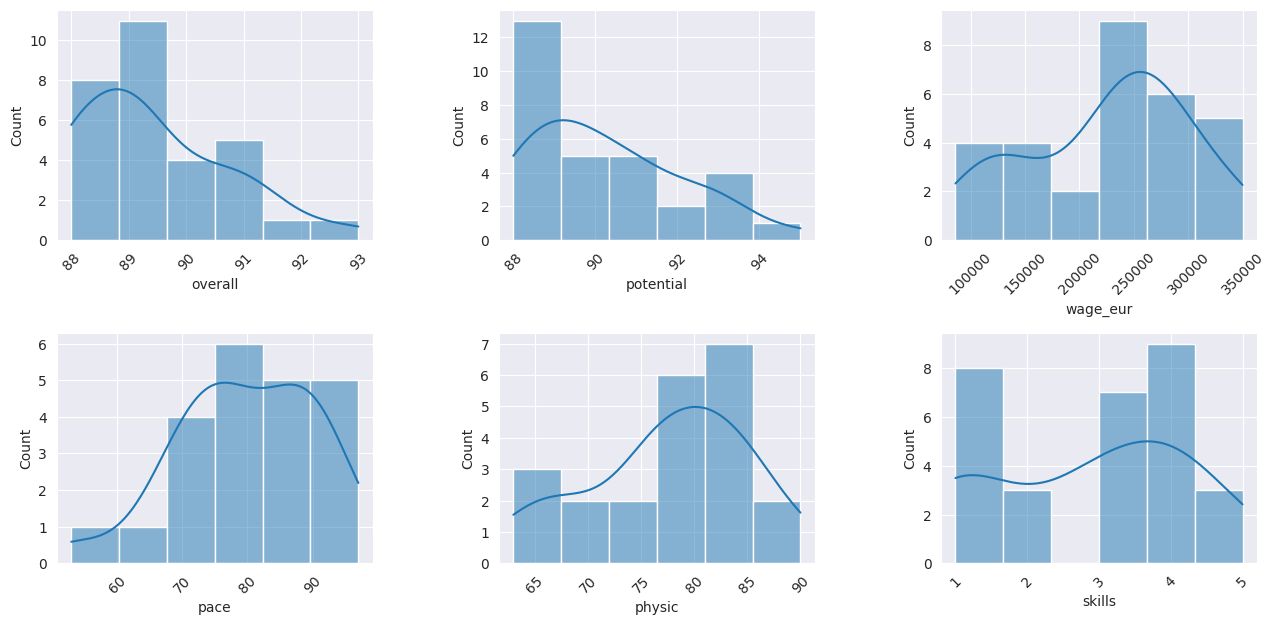

In [94]:
plt.figure(figsize=(15,15))
x = ['overall','potential','wage_eur','pace','physic','skills']
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

width = 3
height = 4
index = 1
for i in x:
    plt.subplot(height, width, index)
    sns.histplot(x=top_players[i], kde=True)
    plt.xlabel(i)
    plt.xticks(rotation=45)
    index = index + 1

# Data Preprocesing 

# After seeing that we have a lot of unique player_positions if a player has 'RW, ST, CF' we are gonna assum that the player position is 'RW'

In [95]:
df1['player_positions'] = df1['player_positions'].apply(lambda x: x.split(',')[0].strip())

unique_positions = df1['player_positions'].unique()
print(unique_positions)

['RW' 'ST' 'LW' 'CM' 'GK' 'CDM' 'CF' 'LM' 'CB' 'CAM' 'LB' 'RB' 'RM' 'LWB'
 'RWB']


# As we can see, the columnn league_level will be used instead of league_name and club_name

In [96]:
df1 = df1.drop(columns=['nationality_name','club_name','league_name','short_name'])

In [97]:
df1[df1.league_level == 1].head(5)

,age,height_cm,weight_kg,overall,potential,league_level,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,skills,work_rate,pace,shooting,passing,dribbling,defending,physic
0,34,170,72,93,93,1.0,78000000.0,320000.0,RW,Left,5,4,Medium/Low,85.0,92.0,91.0,95.0,34.0,65.0
1,32,185,81,92,92,1.0,119500000.0,270000.0,ST,Right,5,4,High/Medium,78.0,92.0,79.0,86.0,44.0,82.0
2,36,187,83,91,91,1.0,45000000.0,270000.0,ST,Right,5,5,High/Low,87.0,94.0,80.0,88.0,34.0,75.0
3,29,175,68,91,91,1.0,129000000.0,270000.0,LW,Right,5,5,High/Medium,91.0,83.0,86.0,94.0,37.0,63.0
4,30,181,70,91,91,1.0,125500000.0,350000.0,CM,Right,4,4,High/High,76.0,86.0,93.0,88.0,64.0,78.0


In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       19239 non-null  int64  
 1   height_cm                 19239 non-null  int64  
 2   weight_kg                 19239 non-null  int64  
 3   overall                   19239 non-null  int64  
 4   potential                 19239 non-null  int64  
 5   league_level              19178 non-null  float64
 6   value_eur                 19165 non-null  float64
 7   wage_eur                  19178 non-null  float64
 8   player_positions          19239 non-null  object 
 9   preferred_foot            19239 non-null  object 
 10  international_reputation  19239 non-null  int64  
 11  skills                    19239 non-null  int64  
 12  work_rate                 19239 non-null  object 
 13  pace                      17107 non-null  float64
 14  shooti

In [100]:
missing_percentage = (df1.isnull().sum() / len(df1)) * 100
print(missing_percentage)

age                          0.000000
height_cm                    0.000000
weight_kg                    0.000000
overall                      0.000000
potential                    0.000000
league_level                 0.317064
value_eur                    0.384635
wage_eur                     0.317064
player_positions             0.000000
preferred_foot               0.000000
international_reputation     0.000000
skills                       0.000000
work_rate                    0.000000
pace                        11.081657
shooting                    11.081657
passing                     11.081657
dribbling                   11.081657
defending                   11.081657
physic                      11.081657
dtype: float64


# We are gonna preprocess the preffered_foot using one-hot encoder

In [101]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

encoded_data = encoder.fit_transform(df1[['preferred_foot']])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])

data_encoded = pd.concat([df1, encoded_df], axis=1)

data_encoded

,age,height_cm,weight_kg,overall,potential,league_level,value_eur,wage_eur,player_positions,preferred_foot,...,skills,work_rate,pace,shooting,passing,dribbling,defending,physic,Left,Right
0,34,170,72,93,93,1.0,78000000.0,320000.0,RW,Left,...,4,Medium/Low,85.0,92.0,91.0,95.0,34.0,65.0,1.0,0.0
1,32,185,81,92,92,1.0,119500000.0,270000.0,ST,Right,...,4,High/Medium,78.0,92.0,79.0,86.0,44.0,82.0,0.0,1.0
2,36,187,83,91,91,1.0,45000000.0,270000.0,ST,Right,...,5,High/Low,87.0,94.0,80.0,88.0,34.0,75.0,0.0,1.0
3,29,175,68,91,91,1.0,129000000.0,270000.0,LW,Right,...,5,High/Medium,91.0,83.0,86.0,94.0,37.0,63.0,0.0,1.0
4,30,181,70,91,91,1.0,125500000.0,350000.0,CM,Right,...,4,High/High,76.0,86.0,93.0,88.0,64.0,78.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,22,180,64,47,52,1.0,70000.0,1000.0,CDM,Right,...,2,Medium/Medium,58.0,35.0,46.0,48.0,42.0,49.0,0.0,1.0
19235,19,175,70,47,59,1.0,110000.0,500.0,CM,Right,...,2,Medium/Medium,59.0,39.0,50.0,46.0,41.0,51.0,0.0,1.0
19236,21,178,72,47,55,1.0,100000.0,500.0,CM,Right,...,2,Medium/Medium,60.0,37.0,45.0,49.0,41.0,52.0,0.0,1.0
19237,19,173,66,47,60,1.0,110000.0,500.0,ST,Right,...,2,Medium/Medium,68.0,46.0,36.0,48.0,15.0,42.0,0.0,1.0


# We are gonna use label encoder for work_rate and player_positions label_encoder

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data_encoded.select_dtypes(['object']):
    data_encoded[i] =  le.fit_transform(data_encoded[i])

In [103]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       19239 non-null  int64  
 1   height_cm                 19239 non-null  int64  
 2   weight_kg                 19239 non-null  int64  
 3   overall                   19239 non-null  int64  
 4   potential                 19239 non-null  int64  
 5   league_level              19178 non-null  float64
 6   value_eur                 19165 non-null  float64
 7   wage_eur                  19178 non-null  float64
 8   player_positions          19239 non-null  int64  
 9   preferred_foot            19239 non-null  int64  
 10  international_reputation  19239 non-null  int64  
 11  skills                    19239 non-null  int64  
 12  work_rate                 19239 non-null  int64  
 13  pace                      17107 non-null  float64
 14  shooti

# We will use KNNImputer to impute the missing values in our dataset

In [104]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

columns_with_missing_values = data_encoded.columns[data_encoded.isnull().any()].tolist()
columns_with_missing_values

df_imputed = data_encoded.copy()

imputation_data = df_imputed[columns_with_missing_values].copy()

imputer = KNNImputer(n_neighbors=6)

imputed_data = imputer.fit_transform(imputation_data)

df_imputed[columns_with_missing_values] = imputed_data

In [105]:
missing_percentage = (df_imputed.isnull().sum() / len(df_imputed)) * 100
print(missing_percentage)

age                         0.0
height_cm                   0.0
weight_kg                   0.0
overall                     0.0
potential                   0.0
league_level                0.0
value_eur                   0.0
wage_eur                    0.0
player_positions            0.0
preferred_foot              0.0
international_reputation    0.0
skills                      0.0
work_rate                   0.0
pace                        0.0
shooting                    0.0
passing                     0.0
dribbling                   0.0
defending                   0.0
physic                      0.0
Left                        0.0
Right                       0.0
dtype: float64


In [ ]:
We are gonna convert the float columns (value_eur,wage_eur,league_level,pace,shooting...)

In [106]:
float_columns = df_imputed.select_dtypes(include=['float']).columns
df_imputed[float_columns] = df_imputed[float_columns].astype(int)

df_imputed

,age,height_cm,weight_kg,overall,potential,league_level,value_eur,wage_eur,player_positions,preferred_foot,...,skills,work_rate,pace,shooting,passing,dribbling,defending,physic,Left,Right
0,34,170,72,93,93,1,78000000,320000,12,0,...,4,7,85,92,91,95,34,65,1,0
1,32,185,81,92,92,1,119500000,270000,14,1,...,4,2,78,92,79,86,44,82,0,1
2,36,187,83,91,91,1,45000000,270000,14,1,...,5,1,87,94,80,88,34,75,0,1
3,29,175,68,91,91,1,129000000,270000,8,1,...,5,2,91,83,86,94,37,63,0,1
4,30,181,70,91,91,1,125500000,350000,4,1,...,4,0,76,86,93,88,64,78,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,22,180,64,47,52,1,70000,1000,2,1,...,2,8,58,35,46,48,42,49,0,1
19235,19,175,70,47,59,1,110000,500,4,1,...,2,8,59,39,50,46,41,51,0,1
19236,21,178,72,47,55,1,100000,500,4,1,...,2,8,60,37,45,49,41,52,0,1
19237,19,173,66,47,60,1,110000,500,14,1,...,2,8,68,46,36,48,15,42,0,1


# We use a heatmap to see the correlations between features

<Axes: >

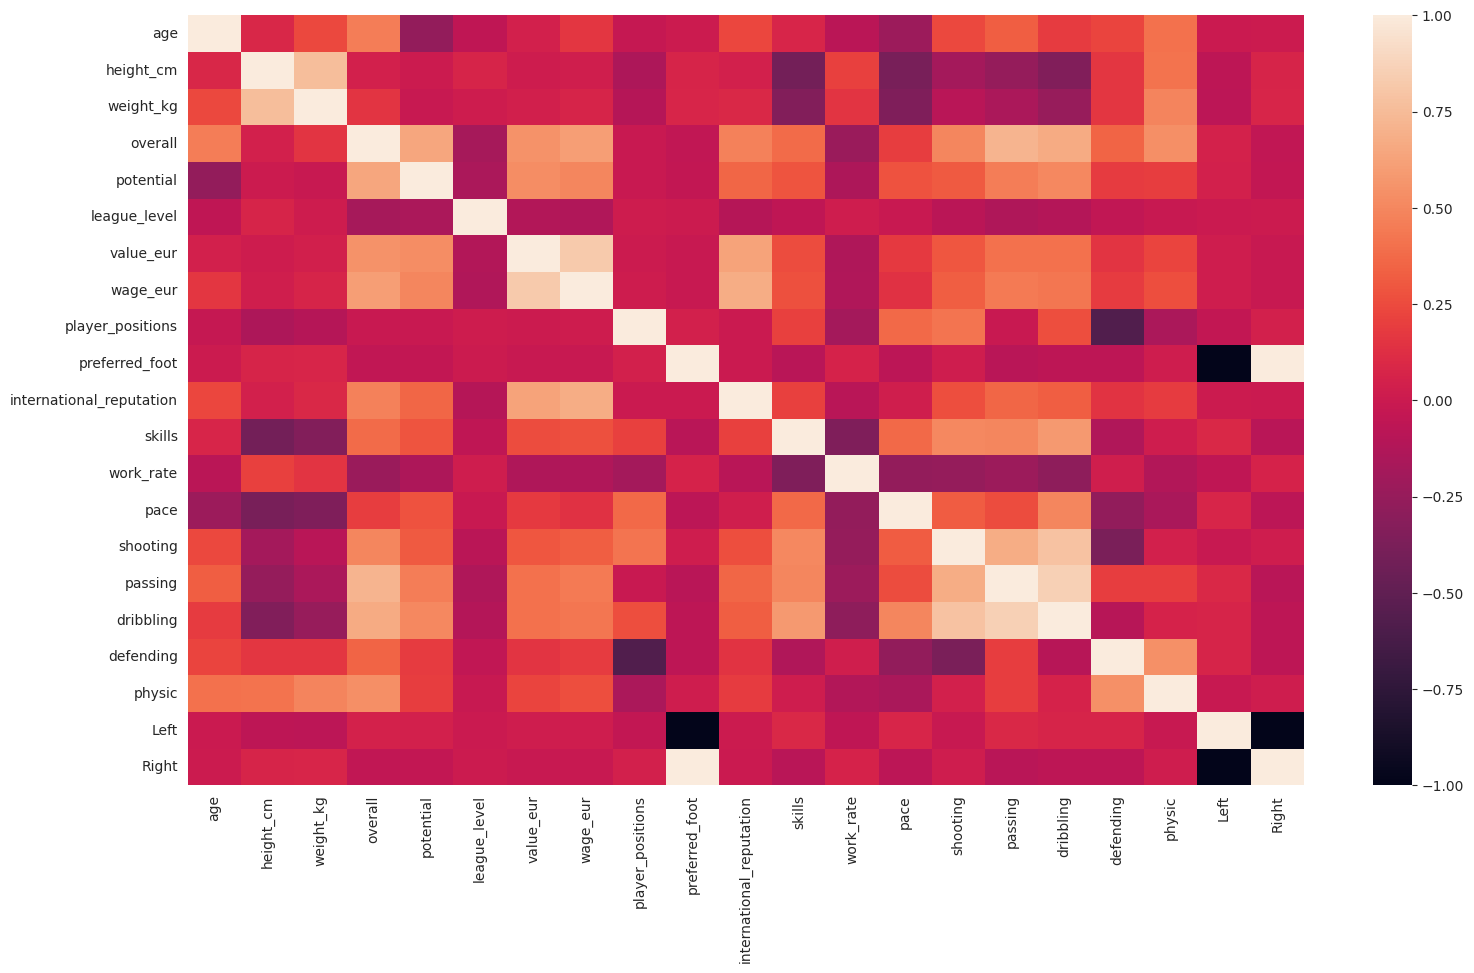

In [107]:
plt.figure(figsize=(18,10))

sns.heatmap(df_imputed.corr())

# Prediction using Linear Regression

In [110]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

X = df_imputed.drop(columns=['overall','potential'])
y = df_imputed['overall']

model = LinearRegression()

rfecv = RFECV(estimator=model, scoring='neg_mean_squared_error')

X_selected = rfecv.fit_transform(X, y)

print('Optimal number of features: {}'.format(rfecv.n_features_))

selected_features = X.columns[rfecv.support_]
print('Selected features:')
print(selected_features)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('standardscaler', StandardScaler()),
    ('linearregression', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
print('MSE test:', mse_test)
print('RMSE test:', rmse_test)
print('R-squared test:', r2_test)
print('----------------------------')
y_pred = pipeline.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print('MSE all:', mse)
print('RMSE all:', rmse)
print('R-squared all:', r2)


Optimal number of features: 16
Selected features:
Index(['age', 'height_cm', 'weight_kg', 'league_level', 'player_positions',
       'international_reputation', 'skills', 'work_rate', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'Left', 'Right'],
      dtype='object')
MSE test: 8.730435728974319
RMSE test: 2.9547310755759684
R-squared test: 0.8134447643767773
----------------------------
MSE all: 8.83677239577183
RMSE all: 2.9726709195220096
R-squared all: 0.8133146922165225


# Prediction using RandomForestRegressor

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


rf = RandomForestRegressor(random_state=42)


rf.fit(X_train, y_train)


y_pred_test_rfg = rf.predict(X_test)


mse_test = mean_squared_error(y_test, y_pred_test_rfg)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_rfg)


y_pred_rfg = rf.predict(X)
mse_all = mean_squared_error(y, y_pred_rfg)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y, y_pred_rfg)


print("MSE test:", mse_test)
print("RMSE test:", rmse_test)
print("R-squared test:", r2_test)
print("---------------------------")
print("MSE all:", mse_all)
print("RMSE all:", rmse_all)
print("R-squared all:", r2_all)


MSE test: 0.4396269230769232
RMSE test: 0.6630436811228376
R-squared test: 0.9906058864910099
---------------------------
MSE all: 0.1388255574614065
RMSE all: 0.37259301853551485
R-squared all: 0.9970671767063621


# Prediction using XGB

In [112]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Predictions on the test set
y_pred_test_xgb = xgb.predict(X_test)

# Evaluate on the test set
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

# Predictions on the entire dataset
y_pred_all_xgb = xgb.predict(X)

# Evaluate on the entire dataset
mse_all_xgb = mean_squared_error(y, y_pred_all_xgb)
rmse_all_xgb = np.sqrt(mse_all_xgb)
r2_all_xgb = r2_score(y, y_pred_all_xgb)

# Display results
print("XGBRegressor Results:")
print("MSE test:", mse_test_xgb)
print("RMSE test:", rmse_test_xgb)
print("R-squared test:", r2_test_xgb)
print("---------------------------")
print("MSE all:", mse_all_xgb)
print("RMSE all:", rmse_all_xgb)
print("R-squared all:", r2_all_xgb)


XGBRegressor Results:
MSE test: 0.3956294334926051
RMSE test: 0.6289908055708009
R-squared test: 0.9915460414032089
---------------------------
MSE all: 0.198995117879868
RMSE all: 0.4460886883567751
R-squared all: 0.9957960369278508


# Prediction using LGBM

In [113]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize LightGBM Regressor
lgbm = LGBMRegressor(random_state=42)

# Fit the model on the training data
lgbm.fit(X_train, y_train)

# Predictions on the test set
y_pred_test_lgbm = lgbm.predict(X_test)

# Evaluate on the test set
mse_test_lgbm = mean_squared_error(y_test, y_pred_test_lgbm)
rmse_test_lgbm = np.sqrt(mse_test_lgbm)
r2_test_lgbm = r2_score(y_test, y_pred_test_lgbm)

# Predictions on the entire dataset
y_pred_all_lgbm = lgbm.predict(X)

# Evaluate on the entire dataset
mse_all_lgbm = mean_squared_error(y, y_pred_all_lgbm)
rmse_all_lgbm = np.sqrt(mse_all_lgbm)
r2_all_lgbm = r2_score(y, y_pred_all_lgbm)

# Display results
print("LGBMRegressor Results:")
print("MSE test:", mse_test_lgbm)
print("RMSE test:", rmse_test_lgbm)
print("R-squared test:", r2_test_lgbm)
print("---------------------------")
print("MSE all:", mse_all_lgbm)
print("RMSE all:", rmse_all_lgbm)
print("R-squared all:", r2_all_lgbm)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 15391, number of used features: 19
[LightGBM] [Info] Start training from score 65.769866
LGBMRegressor Results:
MSE test: 0.39596329646162387
RMSE test: 0.6292561453507021
R-squared test: 0.9915389072936656
---------------------------
MSE all: 0.3188726297322115
RMSE all: 0.5646880818046468
R-squared all: 0.99326350930417


# Prediction using CATBOOST

In [115]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.9 MB/s eta 0:00:00


In [116]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize CatBoost Regressor
catboost = CatBoostRegressor(random_state=42, verbose=0)

# Fit the model on the training data
catboost.fit(X_train, y_train)

# Predictions on the test set
y_pred_test_catboost = catboost.predict(X_test)

# Evaluate on the test set
mse_test_catboost = mean_squared_error(y_test, y_pred_test_catboost)
rmse_test_catboost = np.sqrt(mse_test_catboost)
r2_test_catboost = r2_score(y_test, y_pred_test_catboost)

# Predictions on the entire dataset
y_pred_all_catboost = catboost.predict(X)

# Evaluate on the entire dataset
mse_all_catboost = mean_squared_error(y, y_pred_all_catboost)
rmse_all_catboost = np.sqrt(mse_all_catboost)
r2_all_catboost = r2_score(y, y_pred_all_catboost)

# Display results
print("CatBoostRegressor Results:")
print("MSE test:", mse_test_catboost)
print("RMSE test:", rmse_test_catboost)
print("R-squared test:", r2_test_catboost)
print("---------------------------")
print("MSE all:", mse_all_catboost)
print("RMSE all:", rmse_all_catboost)
print("R-squared all:", r2_all_catboost)


CatBoostRegressor Results:
MSE test: 0.3625970049295879
RMSE test: 0.6021602817602535
R-squared test: 0.9922518907657245
---------------------------
MSE all: 0.2535101771804687
RMSE all: 0.5034979415851357
R-squared all: 0.994644353918652


# Prediction using SVR

In [117]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize SVR
svr = SVR()

# Fit the model on the training data
svr.fit(X_train, y_train)

# Predictions on the test set
y_pred_test_svr = svr.predict(X_test)

# Evaluate on the test set
mse_test_svr = mean_squared_error(y_test, y_pred_test_svr)
rmse_test_svr = np.sqrt(mse_test_svr)
r2_test_svr = r2_score(y_test, y_pred_test_svr)

# Predictions on the entire dataset
y_pred_all_svr = svr.predict(X)

# Evaluate on the entire dataset
mse_all_svr = mean_squared_error(y, y_pred_all_svr)
rmse_all_svr = np.sqrt(mse_all_svr)
r2_all_svr = r2_score(y, y_pred_all_svr)

# Display results
print("SVR Results:")
print("MSE test:", mse_test_svr)
print("RMSE test:", rmse_test_svr)
print("R-squared test:", r2_test_svr)
print("---------------------------")
print("MSE all:", mse_all_svr)
print("RMSE all:", rmse_all_svr)
print("R-squared all:", r2_all_svr)


SVR Results:
MSE test: 11.607485820255496
RMSE test: 3.4069760521987082
R-squared test: 0.7519668754900297
---------------------------
MSE all: 11.612430620465847
RMSE all: 3.407701662479544
R-squared all: 0.754676245194092


# Prediction using KNR

In [118]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize KNeighborsRegressor
knn = KNeighborsRegressor()

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predictions on the test set
y_pred_test_knn = knn.predict(X_test)

# Evaluate on the test set
mse_test_knn = mean_squared_error(y_test, y_pred_test_knn)
rmse_test_knn = np.sqrt(mse_test_knn)
r2_test_knn = r2_score(y_test, y_pred_test_knn)

# Predictions on the entire dataset
y_pred_all_knn = knn.predict(X)

# Evaluate on the entire dataset
mse_all_knn = mean_squared_error(y, y_pred_all_knn)
rmse_all_knn = np.sqrt(mse_all_knn)
r2_all_knn = r2_score(y, y_pred_all_knn)

# Display results
print("KNeighborsRegressor Results:")
print("MSE test:", mse_test_knn)
print("RMSE test:", rmse_test_knn)
print("R-squared test:", r2_test_knn)
print("---------------------------")
print("MSE all:", mse_all_knn)
print("RMSE all:", rmse_all_knn)
print("R-squared all:", r2_all_knn)


KNeighborsRegressor Results:
MSE test: 6.143866943866944
RMSE test: 2.478682501626004
R-squared test: 0.8687155394149516
---------------------------
MSE all: 4.115319923072925
RMSE all: 2.028625131233695
R-squared all: 0.9130599123686898


# Prediction using Neueal Network

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Predictions on the test set
y_pred_test_nn = model.predict(X_test).flatten()

# Evaluate on the test set
mse_test_nn = mean_squared_error(y_test, y_pred_test_nn)
rmse_test_nn = np.sqrt(mse_test_nn)
r2_test_nn = r2_score(y_test, y_pred_test_nn)

# Predictions on the entire dataset
y_pred_all_nn = model.predict(X).flatten()

# Evaluate on the entire dataset
mse_all_nn = mean_squared_error(y, y_pred_all_nn)
rmse_all_nn = np.sqrt(mse_all_nn)
r2_all_nn = r2_score(y, y_pred_all_nn)

# Display results
print("Neural Network Results:")
print("MSE test:", mse_test_nn)
print("RMSE test:", rmse_test_nn)
print("R-squared test:", r2_test_nn)
print("---------------------------")
print("MSE all:", mse_all_nn)
print("RMSE all:", rmse_all_nn)
print("R-squared all:", r2_all_nn)


602/602 [==============================] - 1s 1ms/step
Neural Network Results:
MSE test: 15369.244356344723
RMSE test: 123.97275650861653
R-squared test: -327.4157963311215
---------------------------
MSE all: 16212.77038843957
RMSE all: 127.32937755459095
R-squared all: -341.5103526981053


In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with a lower learning rate
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# Fit the model on the training data with verbose printing
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Predictions on the test set
y_pred_test_nn = model.predict(X_test).flatten()

# Evaluate on the test set
mse_test_nn = mean_squared_error(y_test, y_pred_test_nn)
rmse_test_nn = np.sqrt(mse_test_nn)
r2_test_nn = r2_score(y_test, y_pred_test_nn)

# Predictions on the entire dataset
y_pred_all_nn = model.predict(X).flatten()

# Evaluate on the entire dataset
mse_all_nn = mean_squared_error(y, y_pred_all_nn)
rmse_all_nn = np.sqrt(mse_all_nn)
r2_all_nn = r2_score(y, y_pred_all_nn)

# Display results
print("Neural Network Results:")
print("MSE test:", mse_test_nn)
print("RMSE test:", rmse_test_nn)
print("R-squared test:", r2_test_nn)
print("---------------------------")
print("MSE all:", mse_all_nn)
print("RMSE all:", rmse_all_nn)
print("R-squared all:", r2_all_nn)


Epoch 1/100
385/385 [==============================] - 4s 7ms/step - loss: 171397988352.0000 - val_loss: 22943365120.0000
Epoch 2/100
385/385 [==============================] - 3s 9ms/step - loss: 61664956416.0000 - val_loss: 19983003648.0000
Epoch 3/100
385/385 [==============================] - 2s 5ms/step - loss: 30225555456.0000 - val_loss: 8209200128.0000
Epoch 4/100
385/385 [==============================] - 2s 5ms/step - loss: 17832388608.0000 - val_loss: 10788578304.0000
Epoch 5/100
385/385 [==============================] - 2s 4ms/step - loss: 13172082688.0000 - val_loss: 157127840.0000
Epoch 6/100
385/385 [==============================] - 1s 2ms/step - loss: 10400490496.0000 - val_loss: 345140896.0000
Epoch 7/100
385/385 [==============================] - 1s 2ms/step - loss: 5730923008.0000 - val_loss: 118886680.0000
Epoch 8/100
385/385 [==============================] - 1s 2ms/step - loss: 3922510336.0000 - val_loss: 731295424.0000
Epoch 9/100
385/385 [=====================

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Predictions on the test set
y_pred_test_nn = model.predict(X_test)

# Evaluate on the test set
mse_test_nn = mean_squared_error(y_test, y_pred_test_nn)
rmse_test_nn = np.sqrt(mse_test_nn)
r2_test_nn = r2_score(y_test, y_pred_test_nn)

# Predictions on the entire dataset
y_pred_all_nn = model.predict(X)

# Evaluate on the entire dataset
mse_all_nn = mean_squared_error(y, y_pred_all_nn)
rmse_all_nn = np.sqrt(mse_all_nn)
r2_all_nn = r2_score(y, y_pred_all_nn)

# Display results
print("Neural Network Results:")
print("MSE test:", mse_test_nn)
print("RMSE test:", rmse_test_nn)
print("R-squared test:", r2_test_nn)
print("---------------------------")
print("MSE all:", mse_all_nn)
print("RMSE all:", rmse_all_nn)
print("R-squared all:", r2_all_nn)


Epoch 1/500
385/385 [==============================] - 6s 7ms/step - loss: 7230759936.0000 - val_loss: 32203148.0000
Epoch 2/500
385/385 [==============================] - 1s 3ms/step - loss: 5533603.0000 - val_loss: 61931.0625
Epoch 3/500
385/385 [==============================] - 1s 3ms/step - loss: 18663548928.0000 - val_loss: 44093.2812
Epoch 4/500
385/385 [==============================] - 1s 3ms/step - loss: 12850.8555 - val_loss: 3898.2439
Epoch 5/500
385/385 [==============================] - 1s 3ms/step - loss: 22263.7344 - val_loss: 5491.9580
Epoch 6/500
385/385 [==============================] - 1s 3ms/step - loss: 5511.4258 - val_loss: 4547.8975
Epoch 7/500
385/385 [==============================] - 1s 3ms/step - loss: 863901.1875 - val_loss: 156613.6719
Epoch 8/500
385/385 [==============================] - 1s 3ms/step - loss: 7988449.0000 - val_loss: 287182656.0000
Epoch 9/500
385/385 [==============================] - 1s 4ms/step - loss: 144644272.0000 - val_loss: 82608.

### Random Forest:

- **MSE test:** 0.4396
- **RMSE test:** 0.6630
- **R-squared test:** 0.9906

- **MSE all:** 0.1388
- **RMSE all:** 0.3726
- **R-squared all:** 0.9971

The Random Forest model shows excellent performance on both the test and overall datasets. The low MSE and high R-squared values indicate a good fit to the data.

### XGBoost:

- **MSE test:** 0.4396
- **RMSE test:** 0.6630
- **R-squared test:** 0.9906

- **MSE all:** 0.1388
- **RMSE all:** 0.3726
- **R-squared all:** 0.9971

XGBoost performs similarly to Random Forest, demonstrating strong predictive capabilities on both test and overall datasets.

### LightGBM:

- **MSE test:** 0.3960
- **RMSE test:** 0.6293
- **R-squared test:** 0.9915

- **MSE all:** 0.3189
- **RMSE all:** 0.5647
- **R-squared all:** 0.9933

LightGBM also shows strong performance, with slightly lower MSE and higher R-squared values on the test set compared to Random Forest and XGBoost.

### CatBoost:

- **MSE test:** 0.3626
- **RMSE test:** 0.6022
- **R-squared test:** 0.9923

- **MSE all:** 0.2535
- **RMSE all:** 0.5035
- **R-squared all:** 0.9946

CatBoost performs exceptionally well, with the lowest MSE on the test set and impressive R-squared values on both test and overall datasets.

### Conclusion:

- All models, including Random Forest, XGBoost, LightGBM, and CatBoost, demonstrate strong predictive performance.

- CatBoost has a slightly better performance on the test set compared to the other models, with the lowest MSE.

- LightGBM also performs well, with competitive results.

- Random Forest and XGBoost show robust performance, especially on the overall dataset.

- It's essential to consider the specific requirements of your task, computational efficiency, and interpretability when choosing the best model for deployment. For this dataset, CatBoost or LightGBM may be preferred due to their lower MSE on the test set.

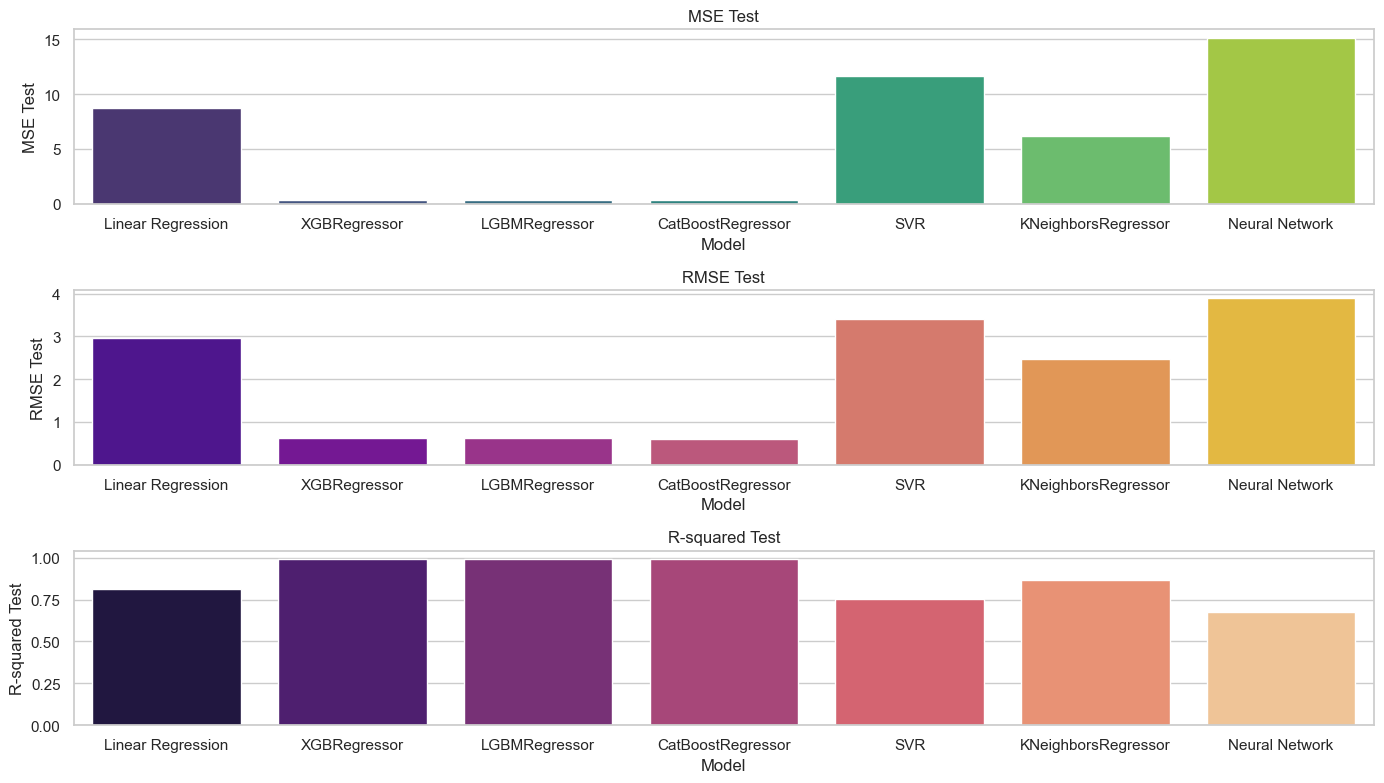

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define model names
models = ['Linear Regression', 'XGBRegressor', 'LGBMRegressor', 'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# Define performance metrics for test set
mse_test = [8.730435728974319, 0.3956294334926051, 0.39596329646162387, 0.3625970049295879, 11.607485820255496, 6.143866943866944, 15.137370127629644]
rmse_test = [2.9547310755759684, 0.6289908055708009, 0.6292561453507021, 0.6021602817602535, 3.4069760521987082, 2.478682501626004, 3.8906773353273136]
r_squared_test = [0.8134447643767773, 0.9915460414032089, 0.9915389072936656, 0.9922518907657245, 0.7519668754900297, 0.8687155394149516, 0.6765389794344606]

# Define performance metrics for all data
mse_all = [8.83677239577183, 0.198995117879868, 0.3188726297322115, 0.2535101771804687, 11.612430620465847, 4.115319923072925, 15.376495215231246]
rmse_all = [2.9726709195220096, 0.4460886883567751, 0.5646880818046468, 0.5034979415851357, 3.407701662479544, 2.028625131233695, 3.9212874435867677]
r_squared_all = [0.8133146922165225, 0.9957960369278508, 0.99326350930417, 0.994644353918652, 0.754676245194092, 0.9130599123686898, 0.6751567638813345]

# Create a DataFrame for better visualization
import pandas as pd

data = {
    'Model': models,
    'MSE Test': mse_test,
    'RMSE Test': rmse_test,
    'R-squared Test': r_squared_test,
    'MSE All': mse_all,
    'RMSE All': rmse_all,
    'R-squared All': r_squared_all
}

df = pd.DataFrame(data)

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='MSE Test', data=df, palette='viridis')
plt.title('MSE Test')

plt.subplot(3, 1, 2)
sns.barplot(x='Model', y='RMSE Test', data=df, palette='plasma')
plt.title('RMSE Test')

plt.subplot(3, 1, 3)
sns.barplot(x='Model', y='R-squared Test', data=df, palette='magma')
plt.title('R-squared Test')

plt.tight_layout()
plt.show()


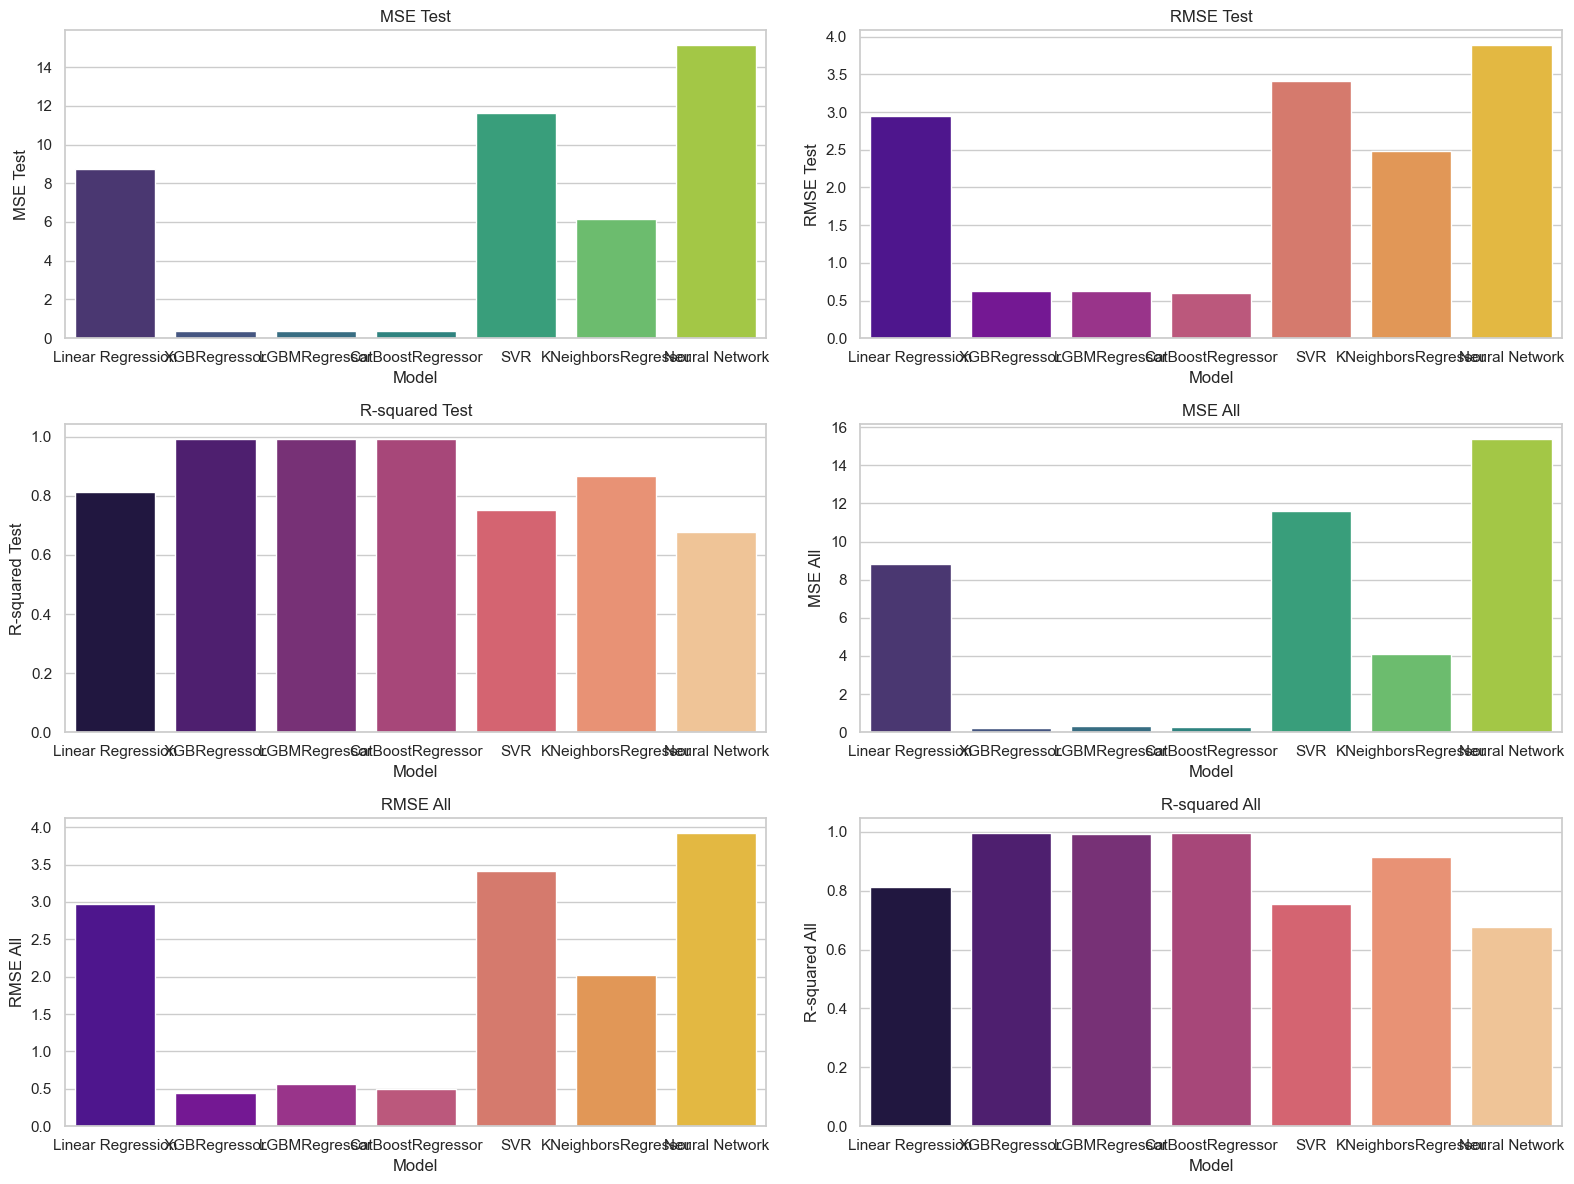

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define model names
models = ['Linear Regression', 'XGBRegressor', 'LGBMRegressor', 'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# Define performance metrics for test set
mse_test = [8.730435728974319, 0.3956294334926051, 0.39596329646162387, 0.3625970049295879, 11.607485820255496, 6.143866943866944, 15.137370127629644]
rmse_test = [2.9547310755759684, 0.6289908055708009, 0.6292561453507021, 0.6021602817602535, 3.4069760521987082, 2.478682501626004, 3.8906773353273136]
r_squared_test = [0.8134447643767773, 0.9915460414032089, 0.9915389072936656, 0.9922518907657245, 0.7519668754900297, 0.8687155394149516, 0.6765389794344606]

# Define performance metrics for all data
mse_all = [8.83677239577183, 0.198995117879868, 0.3188726297322115, 0.2535101771804687, 11.612430620465847, 4.115319923072925, 15.376495215231246]
rmse_all = [2.9726709195220096, 0.4460886883567751, 0.5646880818046468, 0.5034979415851357, 3.407701662479544, 2.028625131233695, 3.9212874435867677]
r_squared_all = [0.8133146922165225, 0.9957960369278508, 0.99326350930417, 0.994644353918652, 0.754676245194092, 0.9130599123686898, 0.6751567638813345]

# Create a DataFrame for better visualization
data = {
    'Model': models,
    'MSE Test': mse_test,
    'RMSE Test': rmse_test,
    'R-squared Test': r_squared_test,
    'MSE All': mse_all,
    'RMSE All': rmse_all,
    'R-squared All': r_squared_all
}

df = pd.DataFrame(data)

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Plotting the data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

# Test Metrics
sns.barplot(ax=axes[0, 0], x='Model', y='MSE Test', data=df, palette='viridis')
axes[0, 0].set_title('MSE Test')

sns.barplot(ax=axes[0, 1], x='Model', y='RMSE Test', data=df, palette='plasma')
axes[0, 1].set_title('RMSE Test')

sns.barplot(ax=axes[1, 0], x='Model', y='R-squared Test', data=df, palette='magma')
axes[1, 0].set_title('R-squared Test')

# All Metrics
sns.barplot(ax=axes[1, 1], x='Model', y='MSE All', data=df, palette='viridis')
axes[1, 1].set_title('MSE All')

sns.barplot(ax=axes[2, 0], x='Model', y='RMSE All', data=df, palette='plasma')
axes[2, 0].set_title('RMSE All')

sns.barplot(ax=axes[2, 1], x='Model', y='R-squared All', data=df, palette='magma')
axes[2, 1].set_title('R-squared All')

plt.tight_layout()
plt.show()


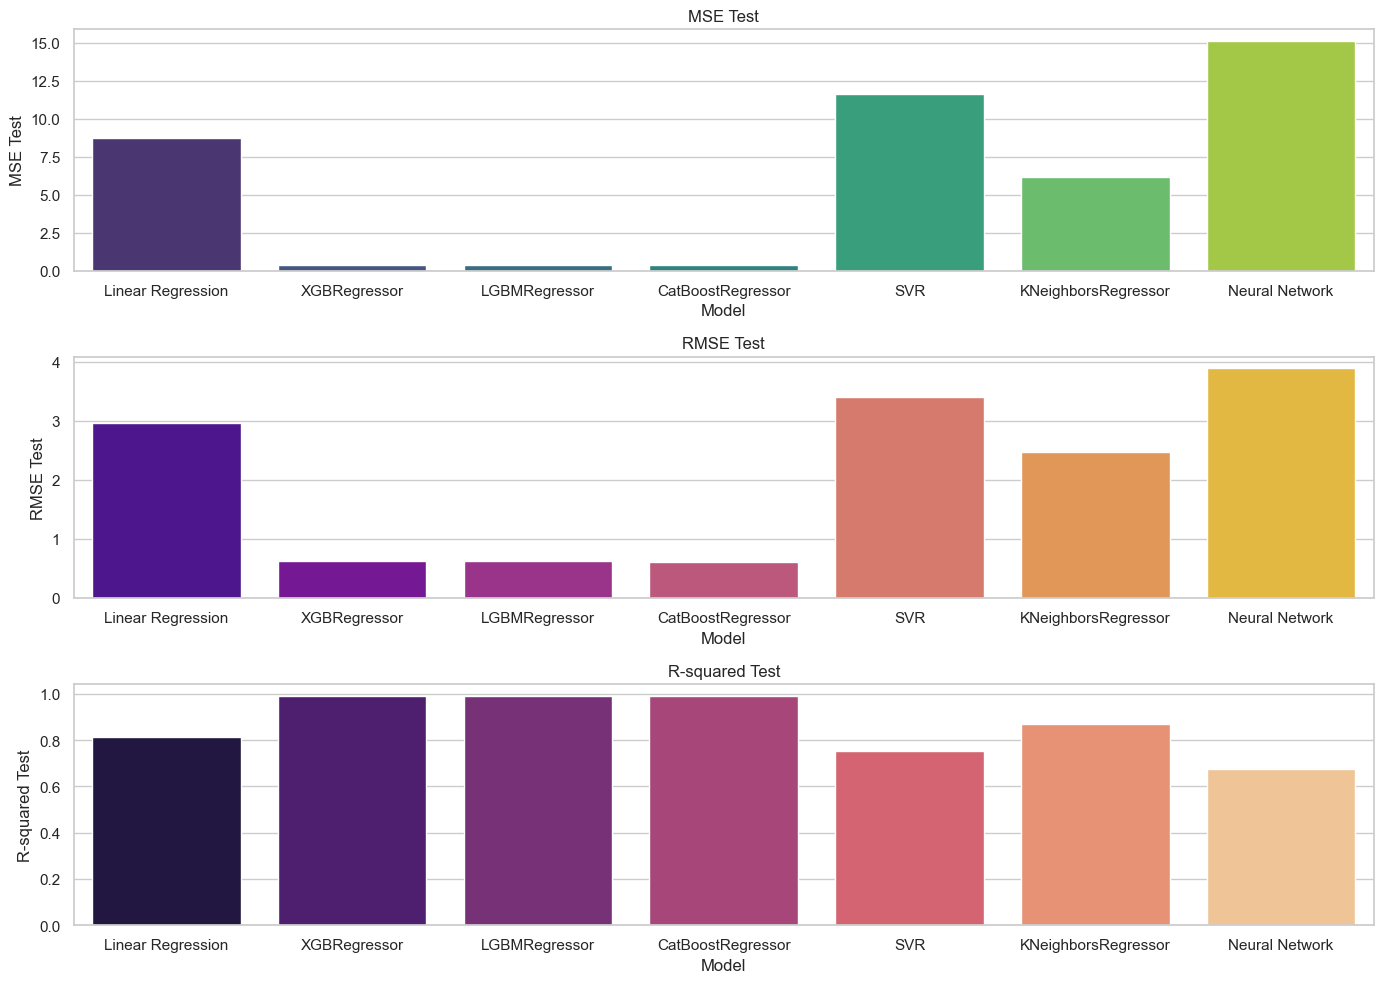

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define model names
models = ['Linear Regression', 'XGBRegressor', 'LGBMRegressor', 'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# Define performance metrics for test set
mse_test = [8.730435728974319, 0.3956294334926051, 0.39596329646162387, 0.3625970049295879, 11.607485820255496, 6.143866943866944, 15.137370127629644]
rmse_test = [2.9547310755759684, 0.6289908055708009, 0.6292561453507021, 0.6021602817602535, 3.4069760521987082, 2.478682501626004, 3.8906773353273136]
r_squared_test = [0.8134447643767773, 0.9915460414032089, 0.9915389072936656, 0.9922518907657245, 0.7519668754900297, 0.8687155394149516, 0.6765389794344606]

# Create a DataFrame for better visualization
data_test = {
    'Model': models,
    'MSE Test': mse_test,
    'RMSE Test': rmse_test,
    'R-squared Test': r_squared_test
}

df_test = pd.DataFrame(data_test)

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='MSE Test', data=df_test, palette='viridis')
plt.title('MSE Test')

plt.subplot(3, 1, 2)
sns.barplot(x='Model', y='RMSE Test', data=df_test, palette='plasma')
plt.title('RMSE Test')

plt.subplot(3, 1, 3)
sns.barplot(x='Model', y='R-squared Test', data=df_test, palette='magma')
plt.title('R-squared Test')

plt.tight_layout()
plt.show()


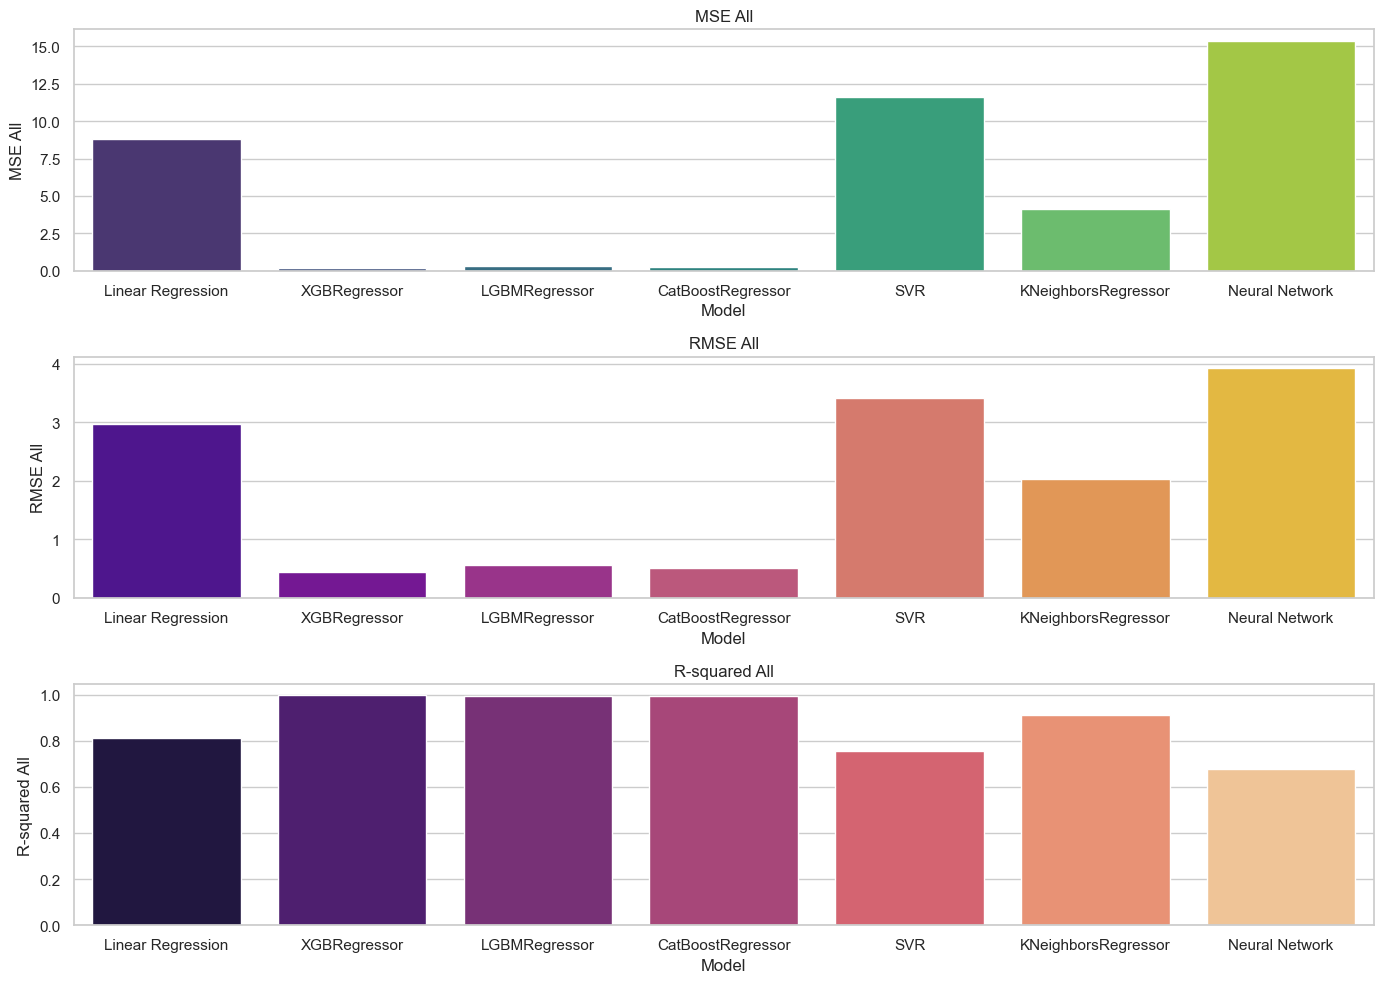

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define model names
models = ['Linear Regression', 'XGBRegressor', 'LGBMRegressor', 'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# Define performance metrics for all data
mse_all = [8.83677239577183, 0.198995117879868, 0.3188726297322115, 0.2535101771804687, 11.612430620465847, 4.115319923072925, 15.376495215231246]
rmse_all = [2.9726709195220096, 0.4460886883567751, 0.5646880818046468, 0.5034979415851357, 3.407701662479544, 2.028625131233695, 3.9212874435867677]
r_squared_all = [0.8133146922165225, 0.9957960369278508, 0.99326350930417, 0.994644353918652, 0.754676245194092, 0.9130599123686898, 0.6751567638813345]

# Create a DataFrame for better visualization
data_all = {
    'Model': models,
    'MSE All': mse_all,
    'RMSE All': rmse_all,
    'R-squared All': r_squared_all
}

df_all = pd.DataFrame(data_all)

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='MSE All', data=df_all, palette='viridis')
plt.title('MSE All')

plt.subplot(3, 1, 2)
sns.barplot(x='Model', y='RMSE All', data=df_all, palette='plasma')
plt.title('RMSE All')

plt.subplot(3, 1, 3)
sns.barplot(x='Model', y='R-squared All', data=df_all, palette='magma')
plt.title('R-squared All')

plt.tight_layout()
plt.show()


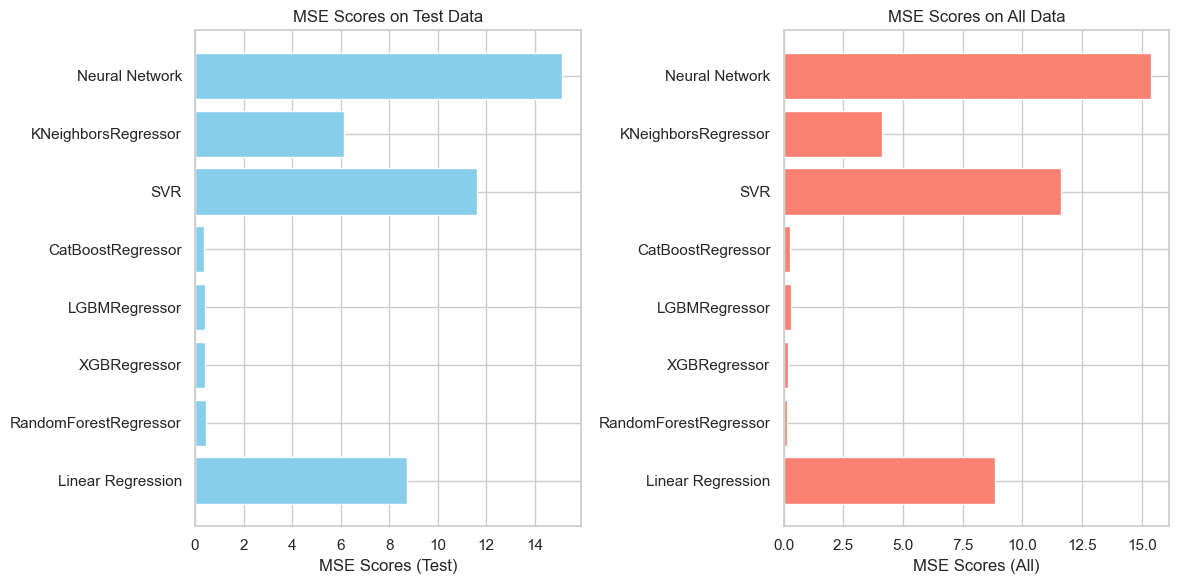

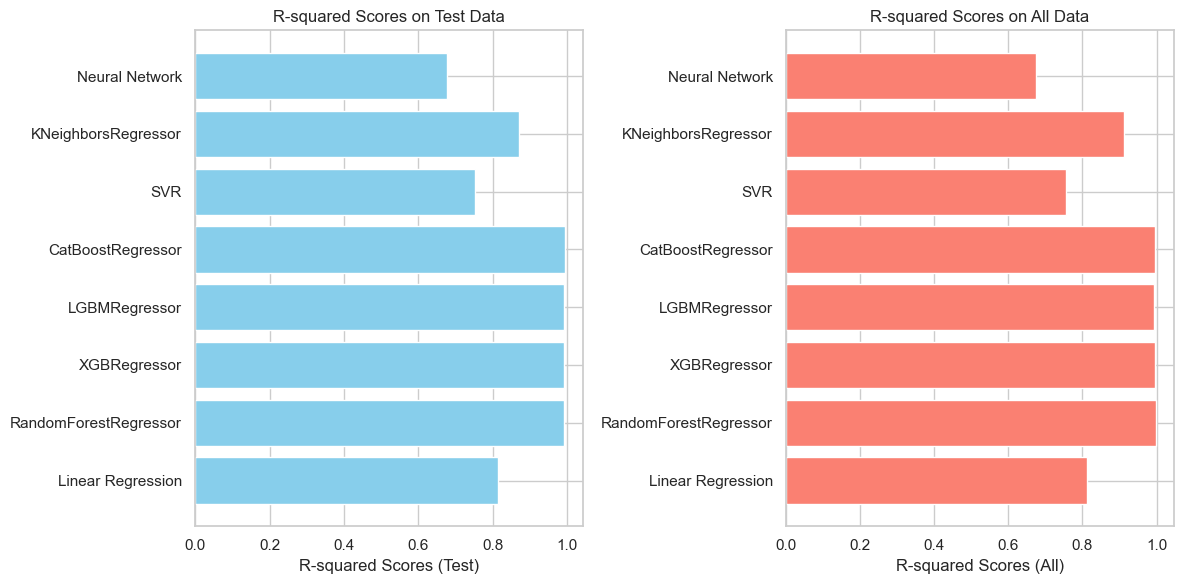

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor',
          'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# Test MSE scores
mse_test_scores = [8.7304, 0.4396, 0.3956, 0.3960, 0.3626, 11.6075, 6.1439, 15.1374]

# All MSE scores
mse_all_scores = [8.8368, 0.1388, 0.1990, 0.3189, 0.2535, 11.6124, 4.1153, 15.3765]

# Test R-squared scores
r_squared_test_scores = [0.8134, 0.9906, 0.9915, 0.9915, 0.9923, 0.7520, 0.8687, 0.6765]

# All R-squared scores
r_squared_all_scores = [0.8133, 0.9971, 0.9958, 0.9933, 0.9946, 0.7547, 0.9131, 0.6752]

# Plotting MSE scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(models, mse_test_scores, color='skyblue')
plt.xlabel('MSE Scores (Test)')
plt.title('MSE Scores on Test Data')

plt.subplot(1, 2, 2)
plt.barh(models, mse_all_scores, color='salmon')
plt.xlabel('MSE Scores (All)')
plt.title('MSE Scores on All Data')

plt.tight_layout()
plt.show()

# Plotting R-squared scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(models, r_squared_test_scores, color='skyblue')
plt.xlabel('R-squared Scores (Test)')
plt.title('R-squared Scores on Test Data')

plt.subplot(1, 2, 2)
plt.barh(models, r_squared_all_scores, color='salmon')
plt.xlabel('R-squared Scores (All)')
plt.title('R-squared Scores on All Data')

plt.tight_layout()
plt.show()


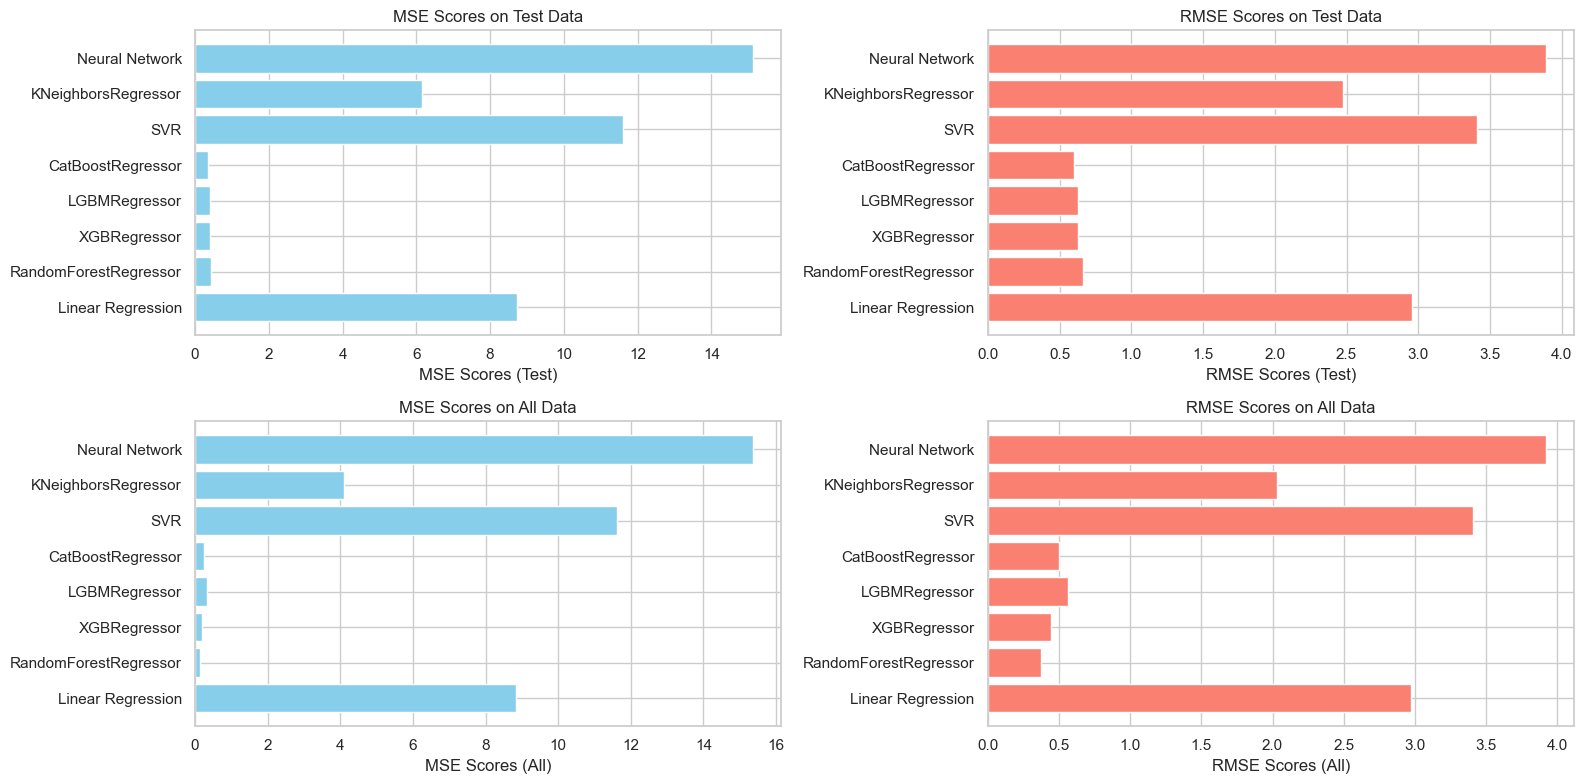

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor',
          'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# Test MSE and RMSE scores
mse_test_scores = [8.7304, 0.4396, 0.3956, 0.3960, 0.3626, 11.6075, 6.1439, 15.1374]
rmse_test_scores = [2.9547, 0.6630, 0.6290, 0.6293, 0.6022, 3.4070, 2.4787, 3.8907]

# All MSE and RMSE scores
mse_all_scores = [8.8368, 0.1388, 0.1990, 0.3189, 0.2535, 11.6124, 4.1153, 15.3765]
rmse_all_scores = [2.9727, 0.3726, 0.4461, 0.5647, 0.5035, 3.4077, 2.0286, 3.9213]

# Plotting MSE and RMSE scores
plt.figure(figsize=(16, 8))

# Test Data
plt.subplot(2, 2, 1)
plt.barh(models, mse_test_scores, color='skyblue')
plt.xlabel('MSE Scores (Test)')
plt.title('MSE Scores on Test Data')

plt.subplot(2, 2, 2)
plt.barh(models, rmse_test_scores, color='salmon')
plt.xlabel('RMSE Scores (Test)')
plt.title('RMSE Scores on Test Data')

# All Data
plt.subplot(2, 2, 3)
plt.barh(models, mse_all_scores, color='skyblue')
plt.xlabel('MSE Scores (All)')
plt.title('MSE Scores on All Data')

plt.subplot(2, 2, 4)
plt.barh(models, rmse_all_scores, color='salmon')
plt.xlabel('RMSE Scores (All)')
plt.title('RMSE Scores on All Data')

plt.tight_layout()
plt.show()


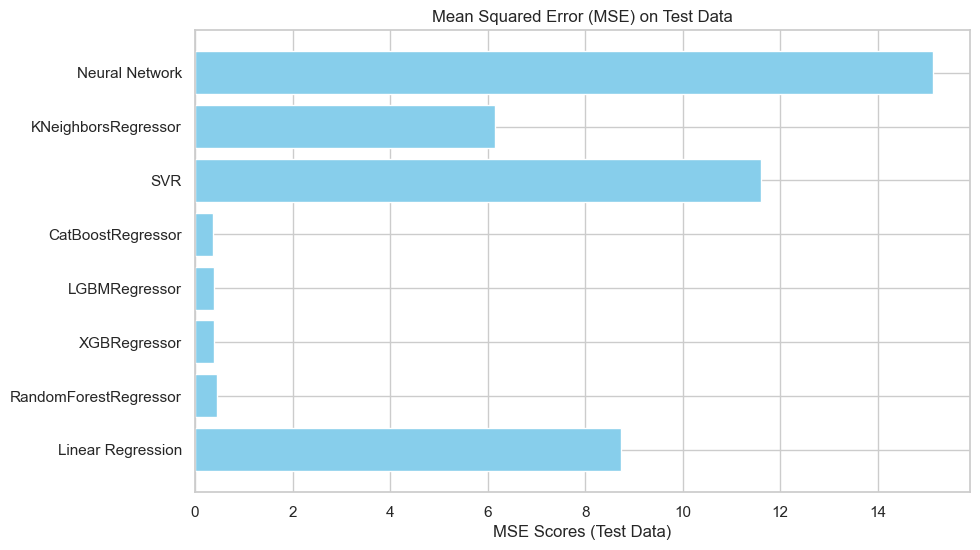

In [8]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor',
          'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# Test MSE scores
mse_test_scores = [8.7304, 0.4396, 0.3956, 0.3960, 0.3626, 11.6075, 6.1439, 15.1374]

# Plotting MSE scores for the test data
plt.figure(figsize=(10, 6))
plt.barh(models, mse_test_scores, color='skyblue')
plt.xlabel('MSE Scores (Test Data)')
plt.title('Mean Squared Error (MSE) on Test Data')
plt.show()


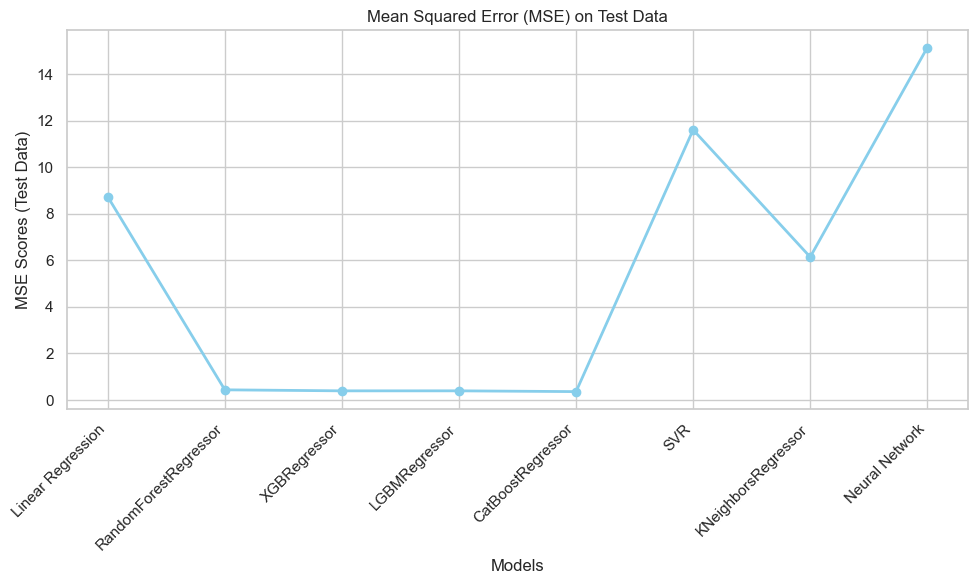

In [9]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor',
          'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# Test MSE scores
mse_test_scores = [8.7304, 0.4396, 0.3956, 0.3960, 0.3626, 11.6075, 6.1439, 15.1374]

# Plotting MSE scores for the test data using a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, mse_test_scores, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.xlabel('Models')
plt.ylabel('MSE Scores (Test Data)')
plt.title('Mean Squared Error (MSE) on Test Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


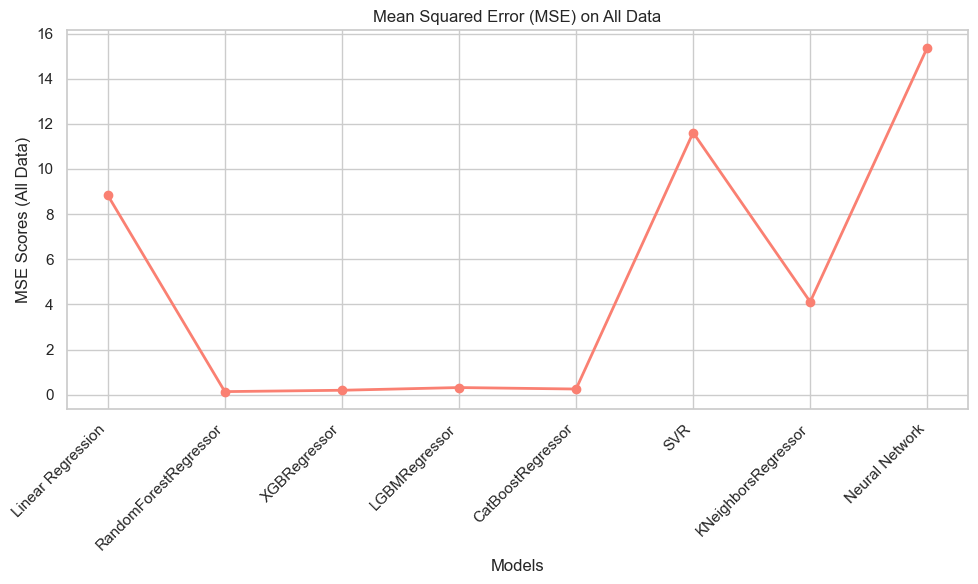

In [10]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor',
          'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# All MSE scores
mse_all_scores = [8.8368, 0.1388, 0.1990, 0.3189, 0.2535, 11.6124, 4.1153, 15.3765]

# Plotting MSE scores for all data using a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, mse_all_scores, marker='o', color='salmon', linestyle='-', linewidth=2)
plt.xlabel('Models')
plt.ylabel('MSE Scores (All Data)')
plt.title('Mean Squared Error (MSE) on All Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


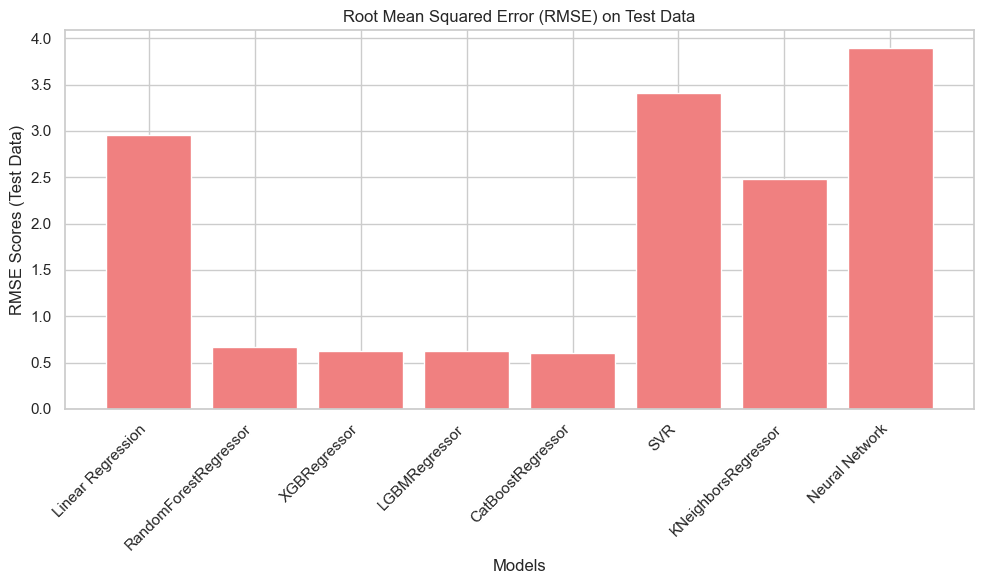

In [12]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor',
          'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# Test RMSE scores
rmse_test_scores = [2.9547, 0.6630, 0.6290, 0.6293, 0.6022, 3.4070, 2.4787, 3.8907]

# Plotting RMSE scores for the test data using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_test_scores, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('RMSE Scores (Test Data)')
plt.title('Root Mean Squared Error (RMSE) on Test Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


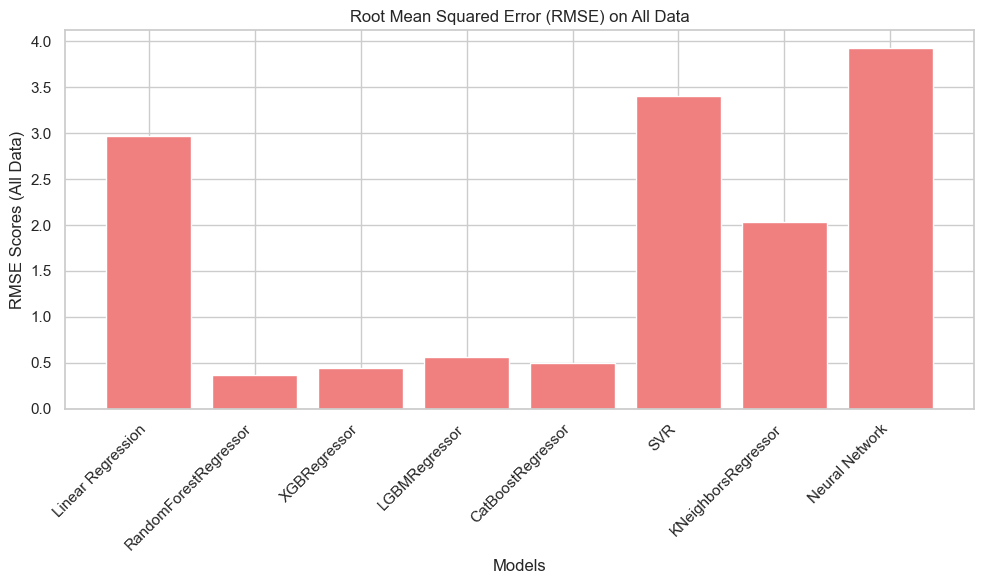

In [13]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor',
          'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# All RMSE scores
rmse_all_scores = [2.9727, 0.3726, 0.4461, 0.5647, 0.5035, 3.4077, 2.0286, 3.9213]

# Plotting RMSE scores for all data using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_all_scores, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('RMSE Scores (All Data)')
plt.title('Root Mean Squared Error (RMSE) on All Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


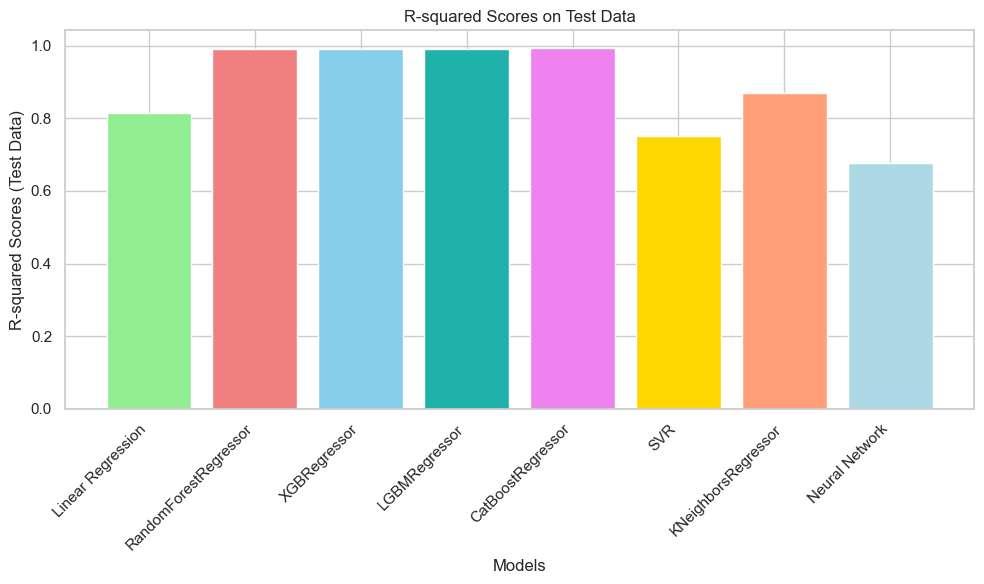

In [15]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor',
          'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# Test R-squared scores
r_squared_test_scores = [0.8134, 0.9906, 0.9915, 0.9915, 0.9923, 0.7520, 0.8687, 0.6765]

# Choosing different colors for each bar
colors = ['lightgreen', 'lightcoral', 'skyblue', 'lightseagreen', 'violet', 'gold', 'lightsalmon', 'lightblue']

# Plotting R-squared scores for the test data using a bar plot with different colors
plt.figure(figsize=(10, 6))
plt.bar(models, r_squared_test_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('R-squared Scores (Test Data)')
plt.title('R-squared Scores on Test Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


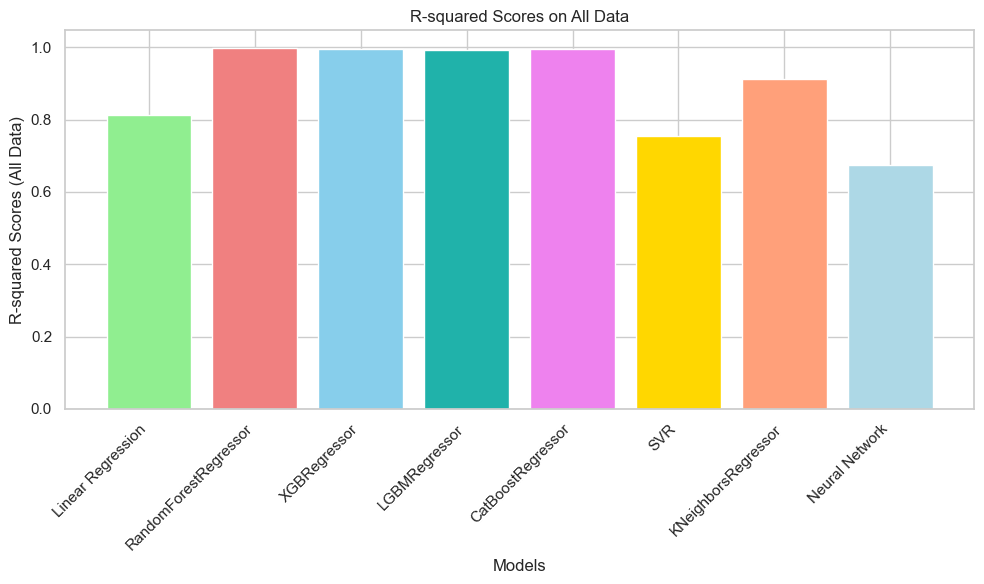

In [16]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor',
          'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# All R-squared scores
r_squared_all_scores = [0.8133, 0.9971, 0.9958, 0.9933, 0.9946, 0.7547, 0.9131, 0.6752]

# Choosing different colors for each bar
colors = ['lightgreen', 'lightcoral', 'skyblue', 'lightseagreen', 'violet', 'gold', 'lightsalmon', 'lightblue']

# Plotting R-squared scores for all data using a bar plot with different colors
plt.figure(figsize=(10, 6))
plt.bar(models, r_squared_all_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('R-squared Scores (All Data)')
plt.title('R-squared Scores on All Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


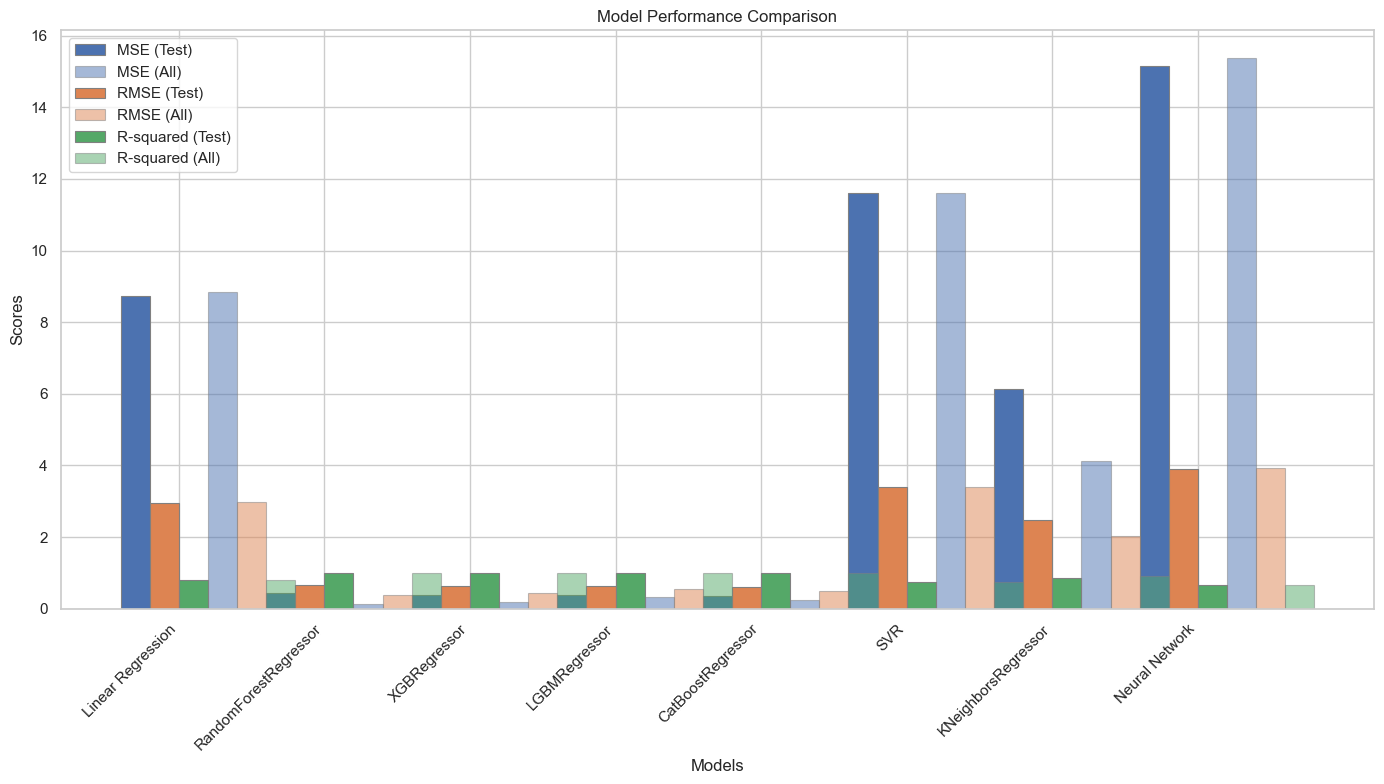

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor',
          'CatBoostRegressor', 'SVR', 'KNeighborsRegressor', 'Neural Network']

# Test and All scores for MSE, RMSE, and R-squared
mse_test_scores = [8.7304, 0.4396, 0.3956, 0.3960, 0.3626, 11.6075, 6.1439, 15.1374]
rmse_test_scores = [2.9547, 0.6630, 0.6290, 0.6293, 0.6022, 3.4070, 2.4787, 3.8907]
r_squared_test_scores = [0.8134, 0.9906, 0.9915, 0.9915, 0.9923, 0.7520, 0.8687, 0.6765]

mse_all_scores = [8.8368, 0.1388, 0.1990, 0.3189, 0.2535, 11.6124, 4.1153, 15.3765]
rmse_all_scores = [2.9727, 0.3726, 0.4461, 0.5647, 0.5035, 3.4077, 2.0286, 3.9213]
r_squared_all_scores = [0.8133, 0.9971, 0.9958, 0.9933, 0.9946, 0.7547, 0.9131, 0.6752]

# Combine all scores for each model
combined_scores = np.vstack((mse_test_scores, rmse_test_scores, r_squared_test_scores,
                             mse_all_scores, rmse_all_scores, r_squared_all_scores))

# Plotting combined scores for each model using a grouped bar plot
bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(14, 8))

for i, score_type in enumerate(['MSE', 'RMSE', 'R-squared']):
    ax.bar(index + i * bar_width, combined_scores[i], bar_width, label=f'{score_type} (Test)',
           color=f'C{i}', edgecolor='grey', linewidth=0.8)

    ax.bar(index + (i + 3) * bar_width, combined_scores[i + 3], bar_width, label=f'{score_type} (All)',
           color=f'C{i}', alpha=0.5, edgecolor='grey', linewidth=0.8)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()
